# Проект Анализ и визуализация личной статистики футболиста

- Все данные собраны и внесены в базу. (07.09.2024)
- Проект находится в стадии подготовки данных. (08.09.2024)
- Проект находится на этапе исследовательского анализа. (24.09.2024)
- Проект находится на стадии аналитической части с 30.09.2024.

## Задачи и план проекта
- Собрать и структурировать данные по проведенным футбольным матчам футболиста Лукашевича Тимофея.
- Провести предобработку данных с помощью библиотек Python.
- Провести исследовательский анализ данных, найти закономерности и проверить статистические гипотезы.
- Подготовить интерактивный дашборд с помощью BI-системы Tableau.

**План проекта**

1. **Сбор данных.**
    - Собрать данные об официальных матчах футболиста с портала Transfermarkt: [Transfermarkt - Тимофей Лукашевич](https://www.transfermarkt.world/timofey-lukashevich/leistungsdaten/spieler/498018).
    - Собрать данные по товарищеским матчам и матчам второй лиги в составе ФК Макслайн.
    - Собрать данные по матчам в составе ФК Трактор.
    - Собрать данные по товарищеским матчам в составе ФК Луч и ФК Дняпро.
    - Собрать данные по матчам за дублирующий состав ФК Динамо Минск и товарищеским матчам.

2. **Предобработка данных.**
    - Привести данные в удобный для чтения вид: преобразовать колонки и данные в самих колонках.
    - Выделить новые столбцы из имеющихся.

3. **Исследовательский анализ данных.**
    - Проанализировать количество матчей по каждому из турниров, соотношение побед, забитых голов командой и соотношение проведенных матчей на натуральных и искусственных полях.
    - Определить лидеров по показателям (больше всего матчей против, 'любимый' стадион, город и т.д.).

4. **Аналитическая часть**
   - Высчитать количество набранных очков, количество забитых и пропущенных голов в разрезе домашних/гостевых матчей и тд.

5. **Корреляционный анализ.**
    - Исследовать корреляцию показателей и найти закономерности.

6. **Проверка гипотез.**
    - Проверить гипотезы: действительно ли в домашних матчах больше побед, чем в гостевых? Правда ли, что на искусственных полях забивается больше мячей, чем на натуральных? И другие гипотезы.

7. **Создание дашборда.**
    - Подготовить удобный интерактивный дашборд в Tableau с визуализациями показателей.

8. **Выводы и наблюдения.**
    - Сформулировать выводы и наблюдения на основе проведенного анализа.

## Сбор и описание данных

- Добавлены данные по официальным играм с сайта Transfermarkt (07.07.2024).
- Добавлены данные с информацией о товарищеских и официальных играх из открытых официальных источников футбольных команд и занесены вручную в таблицу (05.08.2024):
  - 'Луч' (группа ВК и Instagram)
  - 'Макслайн' (группа ВК)
  - 'Дняпро' (группа ВК)
  - 'Трактор' (группа ВК)
- Получены протоколы официальных матчей в составе футбольного клуба 'Динамо-Минск' и занесены в таблицу вручную (07.09.2024).

**Описание**
\-
-
-


## Загрузка данных

Импорт необходимых для работы библиотек:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных. Данные хранятся на локальном устройстве в виде документа Excel.

In [2]:
path = 'D:\\da_projects\\pet-project\\'
raw = pd.read_excel(path+ 'lukashevich_stat.xlsx', sheet_name='list')
pd.set_option('display.max_columns', 30) # отображение максимального числа колонок
display(raw.head())
raw.info()

,дата,моя команда,голы команды,голы против,соперник,место,исскуственное/натуральное,дом гости,турнир,минуты,позиция,гол ассист,карточка
0,2015-07-11,Динамо Дубль,1,1,неман дубль,стайки,нат,д,дуб,30,п,0,0
1,2015-08-22,Динамо Дубль,3,3,жодино дубль,жодино исск,исск,г,дуб,15,п,0,0
2,2015-08-29,Динамо Дубль,0,3,минск дубль,стайки,нат,д,дуб,70,п,0,0
3,2015-09-11,Динамо Дубль,1,4,гранит дубль,лунинец,исск,г,дуб,30,п,0,0
4,2016-02-12,Динамо Дубль,2,1,сморгонь,сморгонь исск,исск,г,тов,75,п,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   дата                       231 non-null    datetime64[ns]
 1   моя команда                231 non-null    object        
 2   голы команды               231 non-null    int64         
 3   голы против                231 non-null    int64         
 4   соперник                   231 non-null    object        
 5   место                      231 non-null    object        
 6   исскуственное/натуральное  231 non-null    object        
 7   дом гости                  231 non-null    object        
 8   турнир                     231 non-null    object        
 9   минуты                     231 non-null    int64         
 10  позиция                    231 non-null    object        
 11  гол ассист                 231 non-null    object        
 12  карточка

- Размер датафрейма: 13 колонок и 231 строка.
- Преобразование типов: 
  - Исходя из того, что данных немного, значения в колонках не будут преобразовываться в булев или категориальный тип, где это возможно.
  - Приоритет отдан лучшей читаемости таблицы.

## Предобработка данных

### Названия колонок

Заменим названия колонок в соответствии с правилами Snake Case на латинице:

In [3]:
df = raw.copy()
df.columns

Index(['дата', 'моя команда', 'голы команды', 'голы против', 'соперник',
       'место', 'исскуственное/натуральное', 'дом гости', 'турнир', 'минуты',
       'позиция', 'гол ассист', 'карточка'],
      dtype='object')

In [4]:
df.columns = [
    'date', 'team', 'team_goals', 'opponent_goals', 'opponent', 'stadium', 'surface', 'home_away',
    'tournament', 'minutes_played', 'position', 'goal_assist', 'card'
]
df.columns

Index(['date', 'my_team', 'team_goals', 'opponent_goals', 'opponent',
       'stadium', 'surface', 'home_away', 'tournament', 'minutes_played',
       'position', 'goal_assist', 'card'],
      dtype='object')

### Дубликаты и пропущенные значения

Проверим наличие дубликатов и пропущенных значений. Их быть не должно, но стоит убедиться.

In [5]:
print(
    f'Дубликаты:\n {df.duplicated().sum()}\n'
    f'Пропущенные значения по колонкам:\n{df.isna().sum()}'
)

Дубликаты:
 0
Пропущенные значения по колонкам:
date              0
my_team           0
team_goals        0
opponent_goals    0
opponent          0
stadium           0
surface           0
home_away         0
tournament        0
minutes_played    0
position          0
goal_assist       0
card              0
dtype: int64


### Замена значений в колонках и поиск неявных дубликатов значений

#### Тип покрытия
- natural - травяной газон.
- artificial - искусственное покрытие.

In [6]:
df['surface'].unique()

array(['нат', 'исск'], dtype=object)

In [7]:
df['surface'] = df['surface'].apply(lambda col: 'natural' if col == 'нат' else 'artificial')
df['surface'].unique()

array(['natural', 'artificial'], dtype=object)

#### Домашняя/Гостевая игра
- home - домашняя.
- away - гостевая.
- neutral - нейтральное поле.

In [8]:
df['home_away'].unique()

array(['д', 'г', 'н'], dtype=object)

In [9]:
df['home_away'] = df['home_away'].replace({'д': 'home', 'г': 'away', 'н': 'neutral'})
df['home_away'].unique()

array(['home', 'away', 'neutral'], dtype=object)

#### Турнир
- reserve -  Reserve League, Чемпионат среди дублеров РБ
- friendly - Friendly Match, товарищеская игра
- premier -  Premier League, Высшая Лига ЧБ
- first - First League, Первая Лига ЧБ
- second - Second League, Вторая Лига ЧБ
- cup - Cup of Belarus, Кубок РБ

In [10]:
df['tournament'].unique()

array(['дуб', 'тов', 1, 'кубок рб', 'высшая', 'д', 2], dtype=object)

In [11]:
df['tournament'] = df['tournament'].replace(
    {'дуб': 'reserve', 'тов': 'friendly', 1: 'first',
     'кубок рб':'cup', 'высшая':'premier', 'д':'reserve', 2:'second'}
)
df['tournament'].unique()

array(['reserve', 'friendly', 'first', 'cup', 'premier', 'second'],
      dtype=object)

#### Позиция на поле
- CM - центральный полузащитник (при 4-4-2 или 3-4-3).
- RCB - правый центральный защитник (в тройке центральных).
- CB - центральный защитник (при двух центральных).
- DM - опорный полузащитник (при 4-1-4-1 и подобных).
- CAM - центральный атакующий полузащитник (инсайд).
- RM - правый полузащитник.
- RB - правый защитник.

In [12]:
df['position'].unique()

array(['п', 'пцз', 'цз', 'цоп', 'цап', 'пп', 'пз'], dtype=object)

In [13]:
df['position'] = df['position'].replace(
    {'цоп':'DM', 'п':'CM', 'цз':'CB', 'пцз':'RCB', 'цап':'CAM', 'пз':'RB', 'пп':'RM'}
)
df['position'].unique()

array(['CM', 'RCB', 'CB', 'DM', 'CAM', 'RM', 'RB'], dtype=object)

#### Голы/Передачи
- G - гол.
- A - голевая передача.
- Автогол уберем из таблицы, он единственный.

In [14]:
df['goal_assist'].unique()

array([0, '1г', '1гп', '2г', '1а', '1+1', '1аг'], dtype=object)

In [15]:
df['goal_assist'] = df['goal_assist'].replace(
    {'1г':'G', '1а':'A', '1гп':'A', '2г':'2G', '1+1':'G+A', '1аг':0}
)
df['goal_assist'].unique()

array([0, 'G', 'A', '2G', 'G+A'], dtype=object)

#### Карточки
- 1 - желтая карточка.
- 2 - вторая желтая карточка (и удаление соответственно).

In [16]:
df['card'].unique()

array([0, 'жк', 'ж', '2жк'], dtype=object)

In [17]:
df['card'] = df['card'].replace({'ж':1, 'жк':1, '2жк':2}) # чтобы избежать предупреждения
df['card'].unique()

C:\Users\ST\AppData\Local\Temp\ipykernel_14092\3997144792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['card'] = df['card'].replace({'ж':1, 'жк':1, '2жк':2}) # чтобы избежать предупреждения


array([0, 1, 2], dtype=int64)

#### Названия команд
Переименуем названия команд. Для каждой команды город будет указан последним словом, а страна будет в скобках (в случае, если команда не из Беларуси). Приписка в скобках (res) в конце строки будет означать, что команда является дублирующим составом. Приписки U- и Youth будут располагаться в начале строки.

In [18]:
df['team'].str.lower().sort_values().unique()

array(['арсенал', 'гранит', 'динамо дубль', 'динамо минск', 'дняпро',
       'дняпро д', 'луч', 'луч д', 'макслайн', 'мол сб беларуси',
       'трактор'], dtype=object)

In [19]:
df['opponent'].str.lower().sort_values().unique()

array(['арсенал дзержинск', 'барановичи', 'батэ', 'батэ дубль', 'бгу',
       'белшина', 'белшина дубль', 'брабранд дания', 'брест дубль',
       'бумпром гомель', 'бунёдкор(ташкент)', 'бфсо динамо',
       'вертикаль калинковичи', 'виктория марьина горка', 'витебск',
       'витебск дубль', 'волна пинск', 'волынь(луцк)', 'голху ',
       'голху гомель', 'гомель', 'гомель д', 'городея', 'городея д',
       'городея дубль', 'гранит', 'гранит дубль', 'динамо брест',
       'динамо брест д', 'динамо минск', 'динамо минск д',
       'динамо минск дубль', 'днепр могилев', 'дордой(бишкек)', 'жлобин',
       'жодино дубль', 'жодино-южное', 'звезда бгу', 'иртыш(казахстан)',
       'ислочь', 'ислочь дубль', 'колос', 'крумкачи', 'крумкачы',
       'крумкачы дубль', 'крылья советов мол(россия)', 'лида',
       'локо гомель', 'локомотив', 'локомотив тбилиси', 'луч минск',
       'минск', 'минск ', 'минск u-19', 'минск д', 'минск дубль',
       'мнпз мозырь', 'мол сб беларуси ', 'мол сб латвии',
  

In [20]:
team_translation = {
    'арсенал': 'Arsenal Dzerzhinsk', 'гранит': 'Granit Mikashevichi', 'динамо дубль': 'Dinamo Minsk (res)', 'динамо минск': 'Dinamo Minsk', 
    'дняпро': 'Dnipro Mogilev','дняпро д': 'Dnipro Mogilev (res)','луч': 'Luch Minsk','луч д': 'Luch Minsk (res)','макслайн': 'Maxline Rogachev',
    'мол сб беларуси': 'U-21 Belarus', 'трактор': 'Traktor Minsk',
    'арсенал дзержинск': 'Arsenal Dzerzhinsk', 'барановичи': 'Baranovichi', 'батэ': 'BATE Borisov', 'батэ дубль': 'BATE Borisov (res)', 
    'бгу': 'BSU Minsk', 'белшина': 'Belshina Bobruisk', 'белшина дубль': 'Belshina Bobruisk (res)', 'брабранд дания': 'Brabrand Aarhus (Denmark)', 
    'брест дубль': 'Dinamo Brest (res)', 'бумпром гомель': 'Bumprom Gomel', 'бунёдкор(ташкент)': 'Bunyodkor Tashkent (Uzbekistan)', 
    'бфсо динамо': 'BFSO Dinamo Minsk', 'вертикаль калинковичи': 'Vertikal Kalinkovichi', 'виктория марьина горка': 'Viktoria Maryina-Gorka', 
    'витебск': 'Vitebsk', 'витебск дубль': 'Vitebsk (res)', 'волна пинск': 'Volna Pinsk', 'волынь(луцк)': 'Volyn Lutsk (Ukraine)',
    'голху ': 'GOLHU Gomel', 'голху': 'GOLHU Gomel', 'голху гомель': 'GOLHU Gomel', 'гомель': 'Gomel', 'гомель д': 'Gomel (res)',
    'городея': 'Gorodeya', 'городея д': 'Gorodeya (res)', 'городея дубль': 'Gorodeya (res)', 'гранит дубль': 'Granit Mikashevichi (res)', 
    'динамо брест': 'Dinamo Brest', 'динамо брест д': 'Dinamo Brest (res)', 'динамо минск д': 'Dinamo Minsk (res)',
    'динамо минск дубль': 'Dinamo Minsk (res)', 'днепр могилев': 'Dnepr Mogilev', 'дордой(бишкек)': 'Dordoi Bishkek (Kyrgyzstan)',
    'жлобин': 'Zhlobin', 'жодино дубль': 'Torpedo Zhodino (res)', 'жодино-южное': 'Zh-Y Zhodino', 'звезда бгу': 'Zvezda-BSU Minsk',
    'иртыш(казахстан)': 'Irtysh Pavlodar (Kazakhstan)', 'ислочь': 'Isloch Minsk', 'ислочь дубль': 'Isloch Minsk (res)', 'колос': 'Kolos Cherven',
    'крумкачи': 'Krumkachy Minsk', 'крумкачы': 'Krumkachy Minsk', 'крумкачы дубль': 'Krumkachy Minsk (res)', 
    'крылья советов мол(россия)': 'Youth Krylya Sovetov Samara (Russia)', 'лида': 'Lida', 'локо гомель': 'Lokomotiv Gomel', 
    'локомотив': 'Lokomotiv Gomel', 'локомотив тбилиси': 'Lokomotiv Tbilisi (Georgia)', 'луч минск': 'Luch Minsk', 'минск': 'Minsk', 
    'минск ': 'Minsk', 'минск u-19': 'U-19 Minsk', 'минск д': 'Minsk (res)', 'минск дубль': 'Minsk (res)', 
    'мнпз мозырь': 'MNPS Mozyr', 'мол сб беларуси': 'U-21 Belarus', 'мол сб латвии': 'U-21 Latvia', 'мол сб беларуси ':'U-21 Belarus',
    'мол сб россии': 'U-21 Russia', 'молодечно': 'Molodechno', 'монтажник мозырь': 'Montazhnik Mozyr', 
    'нафтан': 'Naftan Novopolotsk', 'нафтан дубль': 'Naftan Novopolotsk (res)', 'неман': 'Neman Grodno', 'неман агро': 'Neman Stolbtsy', 
    'неман дубль': 'Neman Grodno (res)', 'неман столбцы': 'Neman Stolbtsy', 'нпз мозырь': 'MNPS Mozyr', 'орша': 'Orsha', 
    'осиповичи': 'Osipovichi', 'островец': 'Ostrovets', 'ошмяны': 'Oshmyany', 'паневежис(литва)': 'Panevezys (Lithuania)', 
    'полоцк': 'Polotsk', 'рубин мол': 'U-21 Rubin Kazan (Russia)', 'рух брест': 'Rukh Brest', 'рух(украина)': 'Rukh Lviv (Ukraine)', 
    'сб беларуси u-17': 'U-17 Belarus', 'светлогорск': 'Khimik Svetlogorsk', 'серебрянка': 'Serebryanka Minsk', 'славия мозырь': 'Slavia Mozyr', 
    'славия мозырь дубль': 'Slavia Mozyr (res)', 'слоним': 'Slonim', 'слуцк дубль': 'Slutsk (res)', 
    'смена гродно': 'Smena Grodno', 'смолевичи': 'Smolevichi', 'сморгонь': 'Smorgon', 'спутник речица': 'Sputnik Rechitsa', 
    'стэнлес': 'Stanles Pinsk', 'текстильщик(россия)': 'Tekstilschik Ivanovo (Russia)', 'торпедо': 'Torpedo Zhodino', 'торпедо минск': 'Torpedo Minsk', 
    'тракай(литва)': 'Trakai (Lithuania)', 'урожайная': 'Urozhaynaya Minsk', 'фк минск': 'Minsk', 'фк слуцк': 'Slutsk', 
    'фридек-мистек(чехия)': 'Frydek-Mistek (Czechia)', 'химик светлогорск': 'Khimik Svetlogorsk', 'шахтер дубль': 'Shakhtyor Soligorsk (res)', 
    'шахтер петриков': 'Shakhtyor Petrikov', 'шахтер солигорск': 'Shakhtyor Soligorsk', 'энергетик-бгату': 'Energetik-BGATU Minsk', 
    'энергетик-бгу': 'Zvezda-BSU Minsk', 'энергетик-бгу д': 'Zvezda-BSU Minsk (res)', 'юас житковичи': 'YAS Zhitkovichi', 
    'юни': 'Uni Minsk', 'ягелония польша': 'Jagiellonia Bialystok (Poland)'
}

In [21]:
df['team'] = df['team'].str.lower().replace(team_translation)
df['opponent'] = df['opponent'].str.lower().replace(team_translation)
print(df['team'].sort_values().unique())
df['opponent'].sort_values().unique()

['Arsenal Dzerzhinsk' 'Dinamo Minsk' 'Dinamo Minsk (res)' 'Dnipro Mogilev'
 'Dnipro Mogilev (res)' 'Granit Mikashevichi' 'Luch Minsk'
 'Luch Minsk (res)' 'Maxline Rogachev' 'Traktor Minsk' 'U-21 Belarus']


array(['Arsenal Dzerzhinsk', 'BATE Borisov', 'BATE Borisov (res)',
       'BFSO Dinamo Minsk', 'BSU Minsk', 'Baranovichi',
       'Belshina Bobruisk', 'Belshina Bobruisk (res)',
       'Brabrand Aarhus (Denmark)', 'Bumprom Gomel',
       'Bunyodkor Tashkent (Uzbekistan)', 'Dinamo Brest',
       'Dinamo Brest (res)', 'Dinamo Minsk', 'Dinamo Minsk (res)',
       'Dnepr Mogilev', 'Dordoi Bishkek (Kyrgyzstan)',
       'Energetik-BGATU Minsk', 'Frydek-Mistek (Czechia)', 'GOLHU Gomel',
       'Gomel', 'Gomel (res)', 'Gorodeya', 'Gorodeya (res)',
       'Granit Mikashevichi', 'Granit Mikashevichi (res)',
       'Irtysh Pavlodar (Kazakhstan)', 'Isloch Minsk',
       'Isloch Minsk (res)', 'Jagiellonia Bialystok (Poland)',
       'Khimik Svetlogorsk', 'Kolos Cherven', 'Krumkachy Minsk',
       'Krumkachy Minsk (res)', 'Lida', 'Lokomotiv Gomel',
       'Lokomotiv Tbilisi (Georgia)', 'Luch Minsk', 'MNPS Mozyr', 'Minsk',
       'Minsk (res)', 'Molodechno', 'Montazhnik Mozyr',
       'Naftan Novopol

#### Место проведения матча
В этой колонке хранится место проведения встречи. В некоторых записях указаны только названия городов  - в таких случаях подразумевается, что это основной стадион в городе, в этих записях может быть разный тип покрытия в соответствующей колонке: натуральное или искусственное. Если игра проходит на другом стадионе, после названия города добавляется описание этого стадиона. Для того чтобы можно было выделить город в отдельную колонку, необходимо переименовать значения, чтобы город всегда был указан первым словом.

In [22]:
df['stadium'].str.lower().sort_values().unique()

array(['атлант новополоцк', 'барановичи исск', 'барановичи нат',
       'белек(турция)', 'бобруйск', 'бобруйск нат', 'бобруйск прокопенко',
       'борисов арена нат', 'борисов городской', 'брест нат',
       'брест савушкин', 'бцоцор брест', 'веста', 'витебск нат',
       'гомель база', 'гомель локо нат', 'гомель манеж', 'городея нат',
       'гродно исск', 'гродно манеж', 'динамо-юни', 'жлобин',
       'жодино исск', 'жодино торпедо', 'кфп минск', 'лида нат',
       'литва вильнюс', 'лунинец', 'марьина горка', 'маяковка',
       'минск победителей', 'могилев', 'могилев нат', 'мозырь ',
       'мозырь нат', 'молодечно нат', 'несвиж', 'огонек', 'озерный нат',
       'озерный смолевичи', 'октябрьский смолевичский р-н', 'орша нат',
       'осиповичи', 'осиповичи нат', 'островец', 'ошмяны', 'петриков',
       'пинск исск', 'пинск нат', 'пинск фут манеж', 'плиса смолевичи',
       'полесье мозырь', 'полоцк нат', 'рога нат', 'рогачев',
       'россия москва нат', 'рцоп-бгу', 'светлогорск на

In [23]:
stadium_translation = {
    'атлант новополоцк': 'Novopolotsk', 'барановичи исск': 'Baranovichi', 'барановичи нат': 'Baranovichi', 
    'белек(турция)': 'Belek (Turkey)', 'бобруйск': 'Bobruisk', 'бобруйск нат': 'Bobruisk', 'бобруйск прокопенко': 'Bobruisk', 
    'борисов арена нат': 'Borisov Arena', 'борисов городской': 'Borisov City Stadium', 'брест нат': 'Brest', 
    'брест савушкин': 'Brest', 'бцоцор брест': 'Brest BCOR', 'веста': 'Dzerzhinsk Vesta', 'витебск нат': 'Vitebsk', 
    'гомель база': 'Gomel Base', 'гомель локо нат': 'Gomel Lokomotiv', 'гомель манеж': 'Gomel Indoor', 'городея нат': 'Gorodeya', 
    'гродно исск': 'Grodno', 'гродно манеж': 'Grodno Indoor', 'динамо-юни': 'Minsk Dinamo-Uni', 'жлобин': 'Zhlobin', 
    'жодино исск': 'Zhodino', 'жодино торпедо': 'Zhodino', 'кфп минск': 'Minsk Pobeditelei', 'лида нат': 'Lida', 
    'литва вильнюс': 'Vilnius (Lithuania)', 'лунинец': 'Luninets', 'марьина горка': 'Maryina-Gorka', 'маяковка': 'Minsk Mayakovskogo', 
    'минск победителей': 'Minsk Pobeditelei', 'могилев': 'Mogilev', 'могилев нат': 'Mogilev', 'мозырь': 'Mozyr', 'мозырь ': 'Mozyr',
    'мозырь нат': 'Mozyr', 'молодечно нат': 'Molodechno', 'несвиж': 'Nesvizh', 'огонек': 'Smolevichi Ogonek', 
    'озерный нат': 'Smolevichi Ozerny', 'озерный смолевичи': 'Smolevichi Ozerny', 'октябрьский смолевичский р-н': 'Smolevichi Oktyabrsky', 
    'орша нат': 'Orsha', 'осиповичи': 'Osipovichi', 'осиповичи нат': 'Osipovichi', 'островец': 'Ostrovets', 
    'ошмяны': 'Oshmyany', 'петриков': 'Petrikov', 'пинск исск': 'Pinsk', 'пинск нат': 'Pinsk', 
    'пинск фут манеж': 'Pinsk Indoor', 'плиса смолевичи': 'Smolevichi Oktyabrsky', 'полесье мозырь': 'Mozyr', 
    'полоцк нат': 'Polotsk', 'рога нат': 'Rogachev', 'рогачев': 'Rogachev', 'россия москва нат': 'Moscow (Russia)', 
    'рцоп-бгу': 'Minsk Semashko', 'светлогорск нат': 'Svetlogorsk', 'семашко': 'Minsk Semashko', 'ск шахтер солигорск': 'Soligorsk', 
    'слоним нат': 'Slonim', 'слуцк исск': 'Slutsk', 'слуцк нат': 'Slutsk', 'сморгонь': 'Smorgon', 
    'сморгонь исск': 'Smorgon', 'сморгонь нат': 'Smorgon', 'сок': 'Minsk SOK', 'сок нат': 'Minsk SOK', 'сок ':'Minsk SOK',
    'стадион торпедо минск': 'Minsk Torpedo', 'стайки': 'Staiki', 'столбцы исск': 'Stolbtsy', 'тихиничи': 'Tikhinichi', 
    'торпедо жодино': 'Zhodino', 'трактор минск': 'Minsk Traktor', 'турция сборы': 'Belek (Turkey)', 
    'фк минск победителей': 'Minsk Pobeditelei', 'фк минск победителей иск': 'Minsk Pobeditelei', 'фк минск победителей ': 'Minsk Pobeditelei',
    'фк минск победителей нат': 'Minsk Pobeditelei', 'фут манеж минск': 'Minsk Pobeditelei Indoor', 'червень': 'Cherven', 
    'юни': 'Minsk Dinamo-Uni'
}

In [24]:
df['stadium'] = df['stadium'].str.lower().replace(stadium_translation)
df['stadium'].sort_values().unique()

array(['Baranovichi', 'Belek (Turkey)', 'Bobruisk', 'Borisov Arena',
       'Borisov City Stadium', 'Brest', 'Brest BCOR', 'Cherven',
       'Dzerzhinsk Vesta', 'Gomel Base', 'Gomel Indoor',
       'Gomel Lokomotiv', 'Gorodeya', 'Grodno', 'Grodno Indoor', 'Lida',
       'Luninets', 'Maryina-Gorka', 'Minsk Dinamo-Uni',
       'Minsk Mayakovskogo', 'Minsk Pobeditelei',
       'Minsk Pobeditelei Indoor', 'Minsk SOK', 'Minsk Semashko',
       'Minsk Torpedo', 'Minsk Traktor', 'Mogilev', 'Molodechno',
       'Moscow (Russia)', 'Mozyr', 'Nesvizh', 'Novopolotsk', 'Orsha',
       'Oshmyany', 'Osipovichi', 'Ostrovets', 'Petrikov', 'Pinsk',
       'Pinsk Indoor', 'Polotsk', 'Rogachev', 'Slonim', 'Slutsk',
       'Smolevichi Ogonek', 'Smolevichi Oktyabrsky', 'Smolevichi Ozerny',
       'Smorgon', 'Soligorsk', 'Staiki', 'Stolbtsy', 'Svetlogorsk',
       'Tikhinichi', 'Vilnius (Lithuania)', 'Vitebsk', 'Zhlobin',
       'Zhodino'], dtype=object)

### Добавление новых колонок на основе имеющихся

#### Год, месяц, день и день недели матча
Извлечем вышеперечисленные показатели из даты встречи:

In [25]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df.head()

,date,my_team,team_goals,opponent_goals,opponent,stadium,surface,home_away,tournament,minutes_played,position,goal_assist,card,year,month,day,weekday
0,2015-07-11,Dinamo Minsk (res),1,1,Neman Grodno (res),Staiki,natural,home,reserve,30,CM,0,0,2015,7,11,Saturday
1,2015-08-22,Dinamo Minsk (res),3,3,Torpedo Zhodino (res),Zhodino,artificial,away,reserve,15,CM,0,0,2015,8,22,Saturday
2,2015-08-29,Dinamo Minsk (res),0,3,Minsk (res),Staiki,natural,home,reserve,70,CM,0,0,2015,8,29,Saturday
3,2015-09-11,Dinamo Minsk (res),1,4,Granit Mikashevichi (res),Luninets,artificial,away,reserve,30,CM,0,0,2015,9,11,Friday
4,2016-02-12,Dinamo Minsk (res),2,1,Smorgon,Smorgon,artificial,away,friendly,75,CM,0,0,2016,2,12,Friday


#### Результат матча и с количество набранных очков за матч

result:
- win - победа команды
- lose - поражение
- draw - ничья

points:
- 3 - победа команды
- 0 - поражение
- 1 - ничья

Если значение в колонке team_goals больше, чем значение в колонке opponent_goals, то в столбце result должно быть установлено значение win (победа). При равенстве значений — draw (ничья), а в остальных случаях — lose (поражение). Также необходимо рассчитать количество очков (points). В современном футболе (с 1994 года) за победу присуждают 3 очка, за ничью — 1 очко, и 0 очков за поражение. До 1994 года за победу присуждали 2 очка. Мы напишем функцию, которая вычисляет значения для колонок result и points в зависимости от этих правил:

In [26]:
def result(data):
    if data['team_goals'] > data['opponent_goals']:
        return 'win', 3
    if data['team_goals'] < data['opponent_goals']:
        return 'lose', 0
    else:
        return 'draw', 1

df[['result', 'points']] = df.apply(result, axis=1).tolist()
df['points'] = df['points'].astype('int64')
df['result'].value_counts()

result
win     120
lose     67
draw     44
Name: count, dtype: int64

#### Город команды противника
Извлечем из названия соперника город, к которому этот соперник относится (city_opponent):

In [27]:
def spl(opponent_series):
    def get_city(opponent):
        words = opponent.split()
        if words[-1] == '(res)':
            return words[-2]
        else:
            return words[-1]
    return opponent_series.apply(get_city)

df['city_opponent'] = spl(df['opponent'])
df['city_opponent'].sort_values().unique()

array(['(Czechia)', '(Denmark)', '(Georgia)', '(Kazakhstan)',
       '(Kyrgyzstan)', '(Lithuania)', '(Poland)', '(Russia)', '(Ukraine)',
       '(Uzbekistan)', 'Baranovichi', 'Belarus', 'Bobruisk', 'Borisov',
       'Brest', 'Cherven', 'Dzerzhinsk', 'Gomel', 'Gorodeya', 'Grodno',
       'Kalinkovichi', 'Latvia', 'Lida', 'Maryina-Gorka', 'Mikashevichi',
       'Minsk', 'Mogilev', 'Molodechno', 'Mozyr', 'Novopolotsk', 'Orsha',
       'Oshmyany', 'Osipovichi', 'Ostrovets', 'Petrikov', 'Pinsk',
       'Polotsk', 'Rechitsa', 'Russia', 'Slonim', 'Slutsk', 'Smolevichi',
       'Smorgon', 'Soligorsk', 'Stolbtsy', 'Svetlogorsk', 'Vitebsk',
       'Zhitkovichi', 'Zhlobin', 'Zhodino'], dtype=object)

#### Город проведения встречи
Извлечем город из колонки stadium в отдельную колонку city_stadium:

In [28]:
df['city_stadium'] = df['stadium'].str.split().str[0]
df['city_stadium'].sort_values().unique()

array(['Baranovichi', 'Belek', 'Bobruisk', 'Borisov', 'Brest', 'Cherven',
       'Dzerzhinsk', 'Gomel', 'Gorodeya', 'Grodno', 'Lida', 'Luninets',
       'Maryina-Gorka', 'Minsk', 'Mogilev', 'Molodechno', 'Moscow',
       'Mozyr', 'Nesvizh', 'Novopolotsk', 'Orsha', 'Oshmyany',
       'Osipovichi', 'Ostrovets', 'Petrikov', 'Pinsk', 'Polotsk',
       'Rogachev', 'Slonim', 'Slutsk', 'Smolevichi', 'Smorgon',
       'Soligorsk', 'Staiki', 'Stolbtsy', 'Svetlogorsk', 'Tikhinichi',
       'Vilnius', 'Vitebsk', 'Zhlobin', 'Zhodino'], dtype=object)

#### Категоризация проведенных на поле минут
Разделим количество сыгранных минут на поле на три категории minutes_category:
- Under 30 - менее 30 минут.
- 30 to 59 - от 30 до 59 минут.
- Over 60 - 60 минут и более.

In [29]:
def minutes(data):
    if data['minutes_played'] < 30:
        return 'under 30'
    if 59 >= data['minutes_played'] >= 30 :
        return '30 to 59'
    else:
        return 'over 60'

df['minutes_category'] = df.apply(minutes, axis=1)
df['minutes_category'].value_counts()

minutes_category
over 60     132
30 to 59     64
under 30     35
Name: count, dtype: int64

#### Категоризация позиции на поле
Создадим столбец position_category, в котором будет храниться более обширная категория позиции игрока (например, защитник или полузащитник):

In [30]:
midfield_positions = ['CM', 'DM', 'CAM', 'RM']
defense_positions = ['CB', 'RCB', 'RB']

# Функция для разделения на полузащиту и защиту
def categorize_position(position):
    if position in midfield_positions:
        return 'midfield'
    elif position in defense_positions:
        return 'defense'
    else:
        return 'unknown'

df['position_category'] = df['position'].apply(categorize_position)
df['position_category'].value_counts()

position_category
midfield    172
defense      59
Name: count, dtype: int64

#### Голы и голевые передачи
Разделим текстовое описание голов и голевых передач на две отдельные колонки: одна будет хранить количество голов, а другая — количество голевых передач, обе в виде целого числа.

In [31]:
def extract_goals_assists(value):
    goals = 0
    assists = 0
    
    # Преобразуем значение в строку для предотвращения ошибки
    value = str(value)
    
    if 'G' in value:
        # Если указаны голы, извлекаем их количество
        goals_part = value.split('G')[0]
        goals = int(goals_part) if goals_part.isdigit() else 1
    
    if 'A' in value:
        # Если указаны ассисты, извлекаем их количество
        assists_part = value.split('A')[0].split('+')[-1]
        assists = int(assists_part) if assists_part.isdigit() else 1

    return pd.Series([goals, assists])

df[['goals', 'assists']] = df['goal_assist'].apply(extract_goals_assists)

#### Результирующая таблица
Создадим результирующую таблицу clean, содержащую необходимые столбцы, расположенные в нужном порядке.

In [32]:
display(df.head())
df.columns

,date,my_team,team_goals,opponent_goals,opponent,stadium,surface,home_away,tournament,minutes_played,position,goal_assist,card,year,month,day,weekday,result,points,city_opponent,city_stadium,minutes_category,position_category,goals,assists
0,2015-07-11,Dinamo Minsk (res),1,1,Neman Grodno (res),Staiki,natural,home,reserve,30,CM,0,0,2015,7,11,Saturday,draw,1,Grodno,Staiki,30 to 59,midfield,0,0
1,2015-08-22,Dinamo Minsk (res),3,3,Torpedo Zhodino (res),Zhodino,artificial,away,reserve,15,CM,0,0,2015,8,22,Saturday,draw,1,Zhodino,Zhodino,under 30,midfield,0,0
2,2015-08-29,Dinamo Minsk (res),0,3,Minsk (res),Staiki,natural,home,reserve,70,CM,0,0,2015,8,29,Saturday,lose,0,Minsk,Staiki,over 60,midfield,0,0
3,2015-09-11,Dinamo Minsk (res),1,4,Granit Mikashevichi (res),Luninets,artificial,away,reserve,30,CM,0,0,2015,9,11,Friday,lose,0,Mikashevichi,Luninets,30 to 59,midfield,0,0
4,2016-02-12,Dinamo Minsk (res),2,1,Smorgon,Smorgon,artificial,away,friendly,75,CM,0,0,2016,2,12,Friday,win,3,Smorgon,Smorgon,over 60,midfield,0,0


Index(['date', 'my_team', 'team_goals', 'opponent_goals', 'opponent',
       'stadium', 'surface', 'home_away', 'tournament', 'minutes_played',
       'position', 'goal_assist', 'card', 'year', 'month', 'day', 'weekday',
       'result', 'points', 'city_opponent', 'city_stadium', 'minutes_category',
       'position_category', 'goals', 'assists'],
      dtype='object')

In [33]:
clean = df[['date', 'team', 'team_goals', 'opponent_goals', 'opponent', 'city_opponent', 'result', 'points',
       'stadium', 'city_stadium', 'surface', 'home_away', 'tournament', 'minutes_played', 'minutes_category',
       'position', 'position_category', 'goals', 'assists', 'card', 'year', 'month', 'day', 'weekday']].sort_values(by = 'date')
display(clean.head())
clean.info()

,date,my_team,team_goals,opponent_goals,opponent,city_opponent,result,points,stadium,city_stadium,surface,home_away,tournament,minutes_played,minutes_category,position,position_category,goals,assists,card,year,month,day,weekday
0,2015-07-11,Dinamo Minsk (res),1,1,Neman Grodno (res),Grodno,draw,1,Staiki,Staiki,natural,home,reserve,30,30 to 59,CM,midfield,0,0,0,2015,7,11,Saturday
1,2015-08-22,Dinamo Minsk (res),3,3,Torpedo Zhodino (res),Zhodino,draw,1,Zhodino,Zhodino,artificial,away,reserve,15,under 30,CM,midfield,0,0,0,2015,8,22,Saturday
2,2015-08-29,Dinamo Minsk (res),0,3,Minsk (res),Minsk,lose,0,Staiki,Staiki,natural,home,reserve,70,over 60,CM,midfield,0,0,0,2015,8,29,Saturday
3,2015-09-11,Dinamo Minsk (res),1,4,Granit Mikashevichi (res),Mikashevichi,lose,0,Luninets,Luninets,artificial,away,reserve,30,30 to 59,CM,midfield,0,0,0,2015,9,11,Friday
4,2016-02-12,Dinamo Minsk (res),2,1,Smorgon,Smorgon,win,3,Smorgon,Smorgon,artificial,away,friendly,75,over 60,CM,midfield,0,0,0,2016,2,12,Friday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               231 non-null    datetime64[ns]
 1   my_team            231 non-null    object        
 2   team_goals         231 non-null    int64         
 3   opponent_goals     231 non-null    int64         
 4   opponent           231 non-null    object        
 5   city_opponent      231 non-null    object        
 6   result             231 non-null    object        
 7   points             231 non-null    int64         
 8   stadium            231 non-null    object        
 9   city_stadium       231 non-null    object        
 10  surface            231 non-null    object        
 11  home_away          231 non-null    object        
 12  tournament         231 non-null    object        
 13  minutes_played     231 non-null    int64         
 14  minutes_ca

### Выводы по предобработке данных
- Переименовал названия колонок в соответствии с правилами Snake Case на латинице.
- Провел исследование дубликатов и пропущенных значений; таких не обнаружено.
- Заменил значения в столбцах на латиницу и устранил неявные дубликаты названий команд, стадионов и турниров.
- Добавил новые столбцы с годом, месяцем, днем и днем недели матча, а также с результатом, заработанными очками за матч, городом проведения встречи, городом команды противника, категорией минут и позиции на поле. Также разделил столбец с голами и передачами на два отдельных столбца.
- Создал результирующую таблицу clean, содержащую необходимые столбцы, расположенные в нужном порядке.

## Исследовательский анализ данных

### Функции для построения графиков

In [34]:
# Функция для построения гистограммы.
# На вход принимает датафрейм (data) и столбец (col), по которому строим гистрограмму, а также количество бинов (bins).

def make_hist(data, col, bins):
    plt.figure(figsize=(16, 6))
    fig = sns.histplot(data=data, bins=bins, x=col)
    fig.set_title(f'Гистограмма распределения матчей по {col}')
    fig.set_xlabel(f'{col}')
    fig.set_ylabel('Количество матчей')
    
    # Добавляем метки на ось x
    plt.xticks(ticks=bins[0:-1], labels=list(range(bins[0], bins[-1])))
    
    # Подсчет и отображение значений над столбцами
    counts, _ = np.histogram(data[col], bins=bins)
    for i in range(len(counts)):
        plt.text((bins[i] + bins[i + 1]) / 2, counts[i], str(counts[i]), ha='center', va='bottom', fontsize=10)

    sns.despine()
    plt.show()

    print(f'Уникальных значений {col}: {data[col].nunique()}')

In [35]:
# Функция для построения столбчатой диаграммы топ-10 значений по заданной категории.
# На вход принимает датафрейм (data) и название столбца (col), по которому будут группироваться данные для отображения топ-10 значений.
# Функция вычисляет процентное отношение каждого значения от общего количества.

def make_top_10(data, col):
    # Группировка данных и подсчет количества строк
    group = (
        data.groupby(col).size()
        .reset_index(name='count')  # Сброс индекса и переименование столбца
        .sort_values(by='count', ascending=False)
        .head(10)
    )
    group['percent_of_total'] = round(group['count'] / len(data) * 100, 2)
    group[col] = group[col].astype('str')  # Преобразование для корректного отображения на графике

    plt.figure(figsize=(16,6))
    fig = sns.barplot(
        data=group,  # выбираем топ-10 значений
        x='count',
        y=col,
        palette='Blues_d',
        hue=col
    )
    
    # Добавление тиков только для значений топ-10
    plt.xticks(ticks=group['count'], labels=[f'{int(val)}' for val in group['count']])

    # Добавление значений процентов на график
    for index, value in enumerate(group['percent_of_total']):
        count_value = group['count'].iloc[index]
        plt.text(count_value, index, f'{value}%', va='center', ha='left', fontsize=12)

    fig.set_title(f'Топ-10 проведенных встреч по {col}')
    fig.set_xlabel('Количество матчей')
    fig.set_ylabel(f'{col}')
    sns.despine()
    plt.show()
    
    print(f'Уникальных значений {col}: {data[col].nunique()}')

In [36]:
# Функция для построения круговой диаграммы.
# На вход принимает датафрейм (data) и название столбца (col), по которому будут группироваться данные.

def make_pie_chart(data, col):
    # Подсчет количества уникальных значений в колонке
    counts = data[col].value_counts()
    display(counts)

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Круговая диаграмма по {col}')
    plt.axis('equal')  # Чтобы круг выглядел правильно
    plt.show()

In [37]:
# Функция для построения боксплота.
# На вход принимает датафрейм (data) и название столбца (col), по которому будет строиться боксплот.

def make_boxplot(data, col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Боксплот по {col}')  # Заголовок графика
    plt.xlabel(col)  # Название оси x
    plt.locator_params(axis='x', nbins=10) # Задаем число тиков на оси X равным 10
    plt.show()

### Датa
Посмотрим за какой период имеем данные, посмотрим на динамику по месяцам, а также распределение матчей по годам, месяцам, дням и дням недели.

In [38]:
print(f'Имеем данные с {clean['date'].min()} по {clean['date'].max()}.\n'
      f'Матчей всего: {len(clean)}, уникальных дат: {clean['date'].nunique()}.')

Имеем данные с 2015-07-11 00:00:00 по 2023-11-04 00:00:00.
Матчей всего: 231, уникальных дат: 231.


В один день проводился максимум один матч.

#### Динамика
Сгруппируем данные по году и месяцу и посмотрим на количество встреч за каждый месяц. В случае, если в месяце не будет сыграно ни одной игры, отразим это на графике.

count    100.0000
mean       2.3000
std        2.0226
min        0.0000
25%        0.0000
50%        2.0000
75%        4.0000
max        9.0000
Name: date_y, dtype: float64


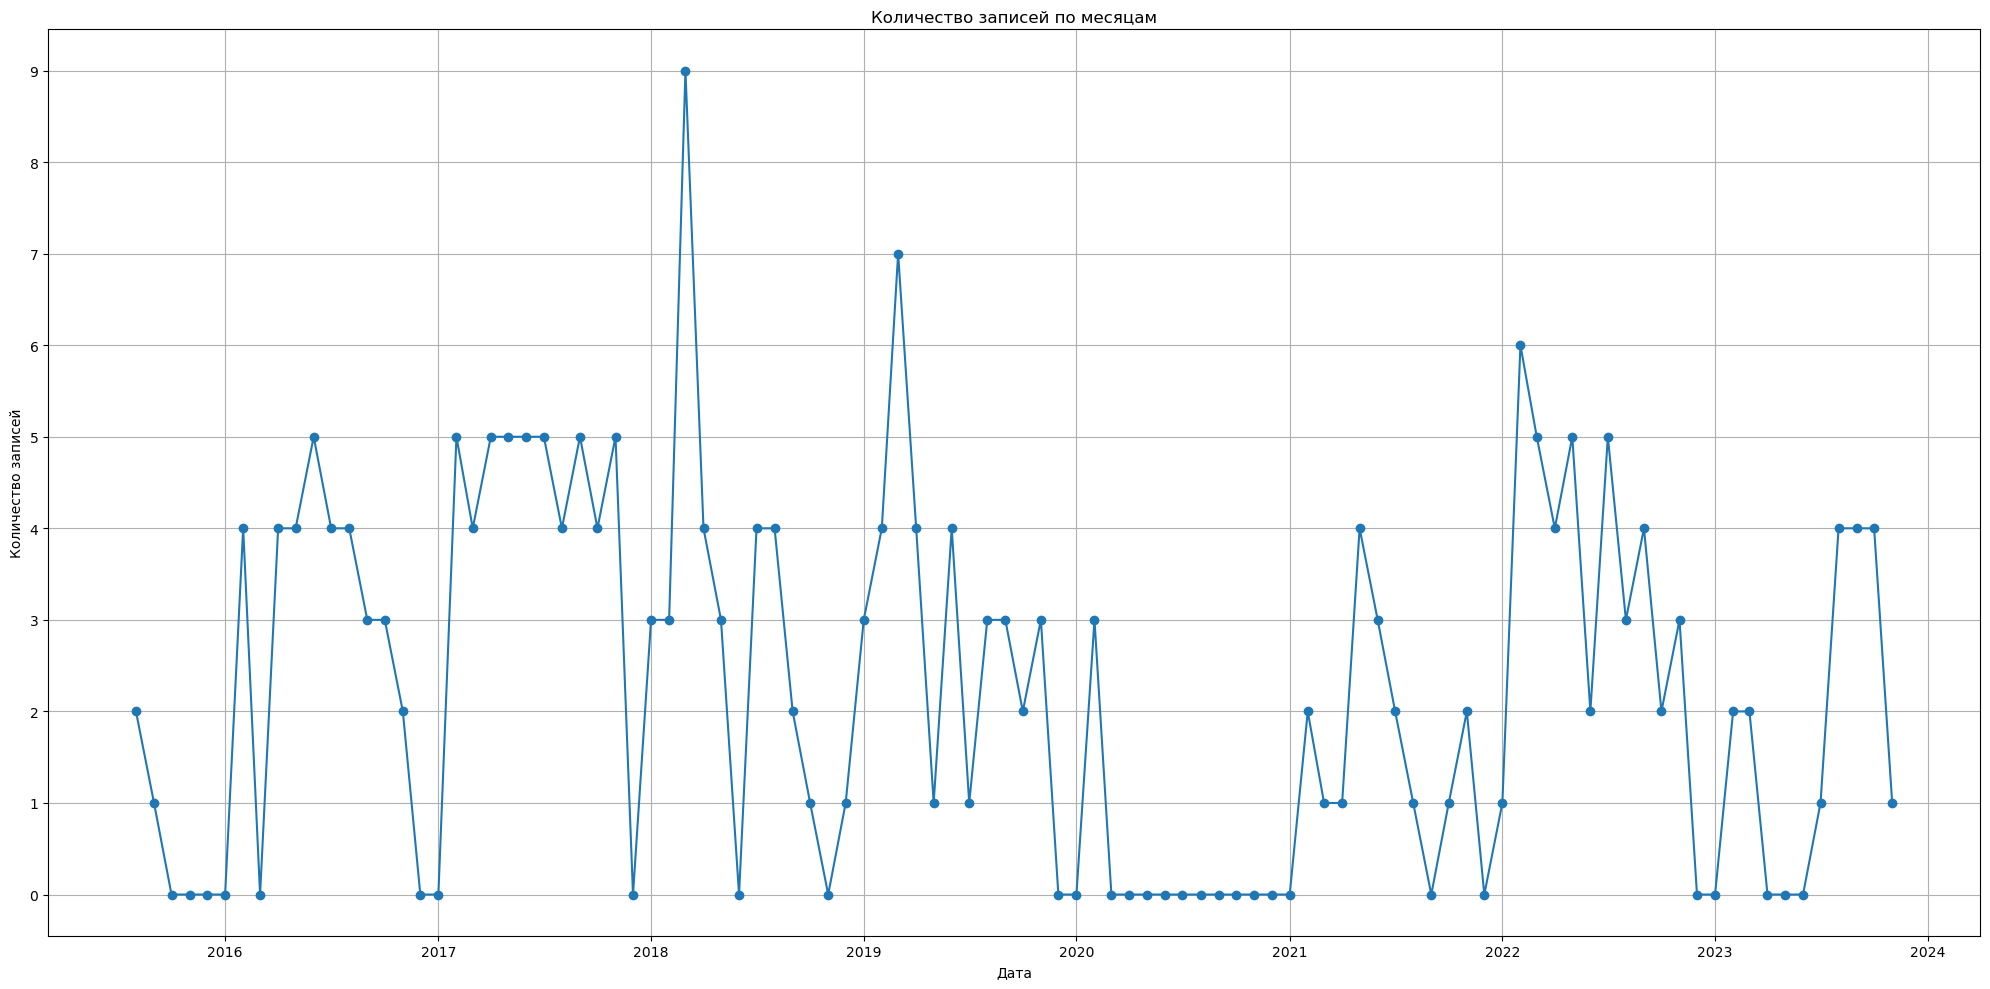

In [39]:
date_grouped = clean.groupby(['year', 'month']).agg({'date':'count'}) # Группируем наши данные по году и месяцу

# Создаем последовательность из месяцев при помощи pd.date_range
date_range = pd.DataFrame(pd.date_range(start=clean['date'].min(), end=clean['date'].max(), freq='MS'), columns=['date'])

date_range['year'] = date_range['date'].dt.year
date_range['month'] = date_range['date'].dt.month
date_range = date_range.merge(date_grouped, on=['year', 'month'], how='left').fillna(0) # Соединяем таблицы
print(date_range['date_y'].describe())

plt.figure(figsize=(20,10))
plt.plot(date_range['date_x'], date_range['date_y'], marker='o')
plt.title('Количество записей по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество записей')

# Добавление всех y-токов (меток) на график
plt.yticks(ticks=range(0, int(date_range['date_y'].max()) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

- Максимальное количество игр за месяц было зарегистрировано в начале 2018 года и составило 9 игр. Среднее число игр в месяц составляет 2.3, а медианное — 2 игры. В декабре каждого года наблюдается спад количества игр до 0. Это связано с особенностями проведения чемпионатов Республики Беларусь по футболу, которые обычно проходят с марта-апреля до ноября. В декабре футболисты часто находятся в отпуске, а с начала января начинается подготовка к новому сезону, в рамках которой обычно проводится больше игр по сравнению с самим сезоном.
- Отсутствие игр на протяжении большей части 2020 года связано с тем, что футболист временно приостановил свою карьеру. Некоторые спады в количестве игр объясняются травмами, в то время как другие обусловлены спортивным принципом и конкуренцией.

#### Распределение по годам
Посмотрим на количество игр за каждый год.

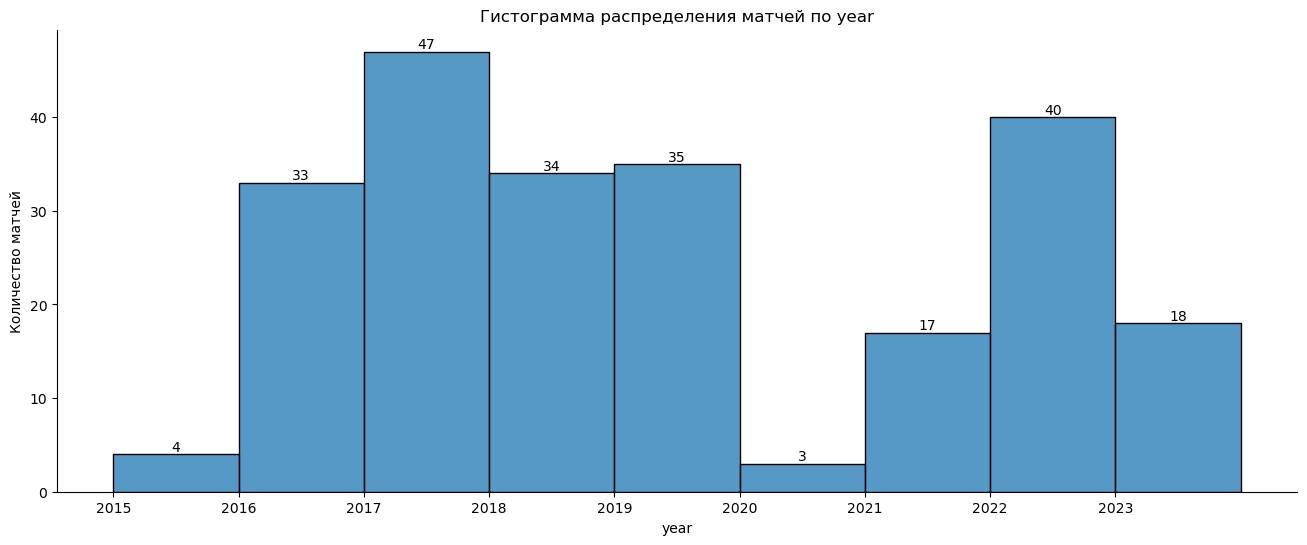

Уникальных значений year: 9
Игр в год в среднем: 25.67


In [40]:
make_hist(clean, 'year', list(range(2015, 2025)))
print(f'Игр в год в среднем: {round(clean.groupby('year')['date'].count().mean(), 2)}')

- В таблице представлены данные за каждый из 9 лет с 2015 по 2023 год. Больше всего игр было сыграно в 2017 году — 47 матчей, затем следует 2022 год с 40 играми. Наименьшее количество игр зафиксировано в 2020 году — 3 матча, и в 2015 году — 4. Однако стоит отметить, что в 2015 году футболист также участвовал в юношеском первенстве, данные по которому не удалось собрать. Важно подчеркнуть, что в 2016 году футболист также играл в юношеском первенстве параллельно с основными матчами, что могло отразиться на статистике.
- Среднее число игр за указанный промежуток времени составляет 25.67 матчей в год.

#### Распределение по месяцам

Посмотрим на сезонность проведенных игр.

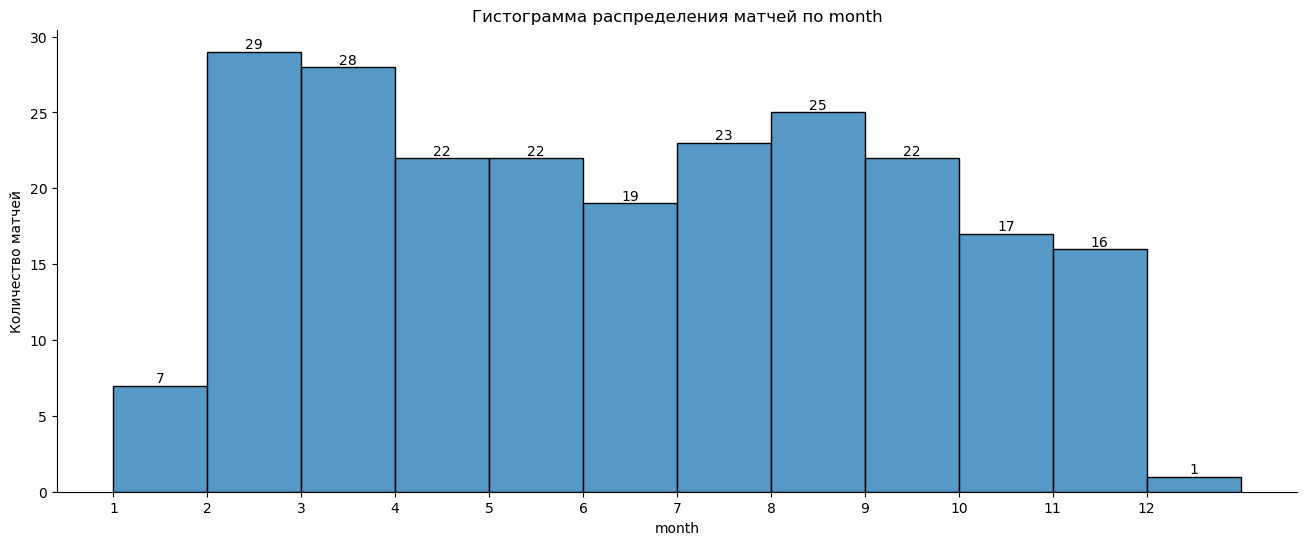

Уникальных значений month: 12


In [41]:
make_hist(clean, 'month', list(range(1, 14)))

Игры проводились в каждый из 12 месяцев. В декабре был сыгран только один матч. Больше всего игр проводилось в феврале (29) и марте (28) — как уже упоминалось, это связано с тем, что во время подготовки к старту чемпионата играется большее количество матчей. Из месяцев, проходящих в сезон, больше всего игр было сыграно в августе (25).

#### Распределение по дням

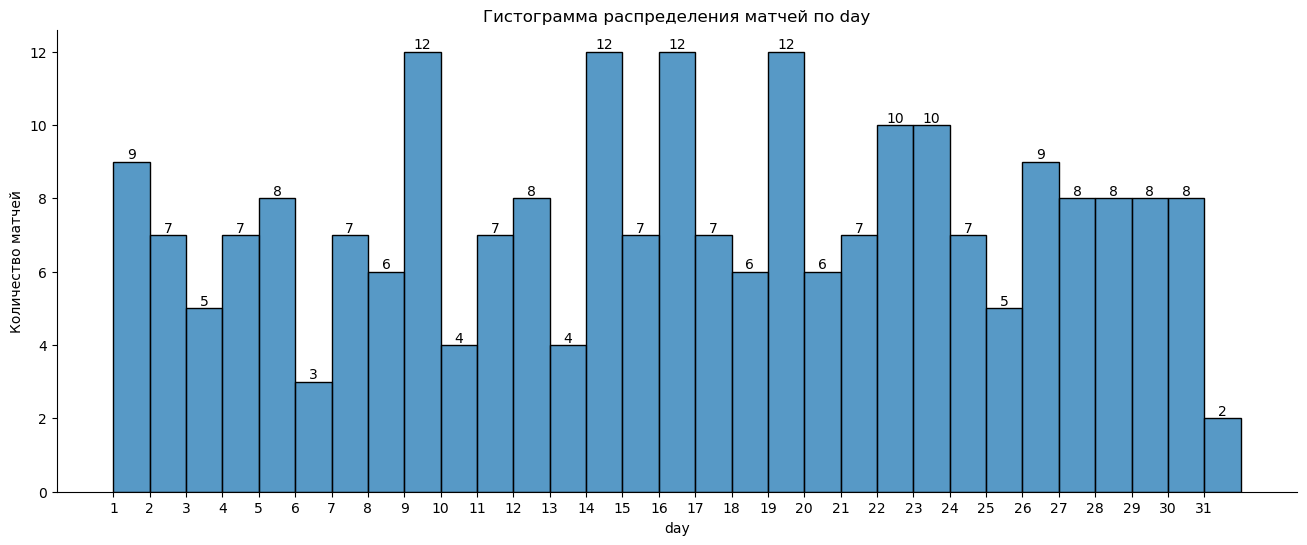

Уникальных значений day: 31


In [42]:
make_hist(clean, 'day', list(range(1, 33)))

Игры проводились в каждое число месяца. Меньше всего матчей было сыграно 31 числа — всего 2 игры, что неудивительно, так как этот день выпадает реже. Возможно, руководители старались избегать игр 13 числа — таких матчей всего 4, тогда как 14 числа прошло целых 12 игр)

#### Распределение по дням недели

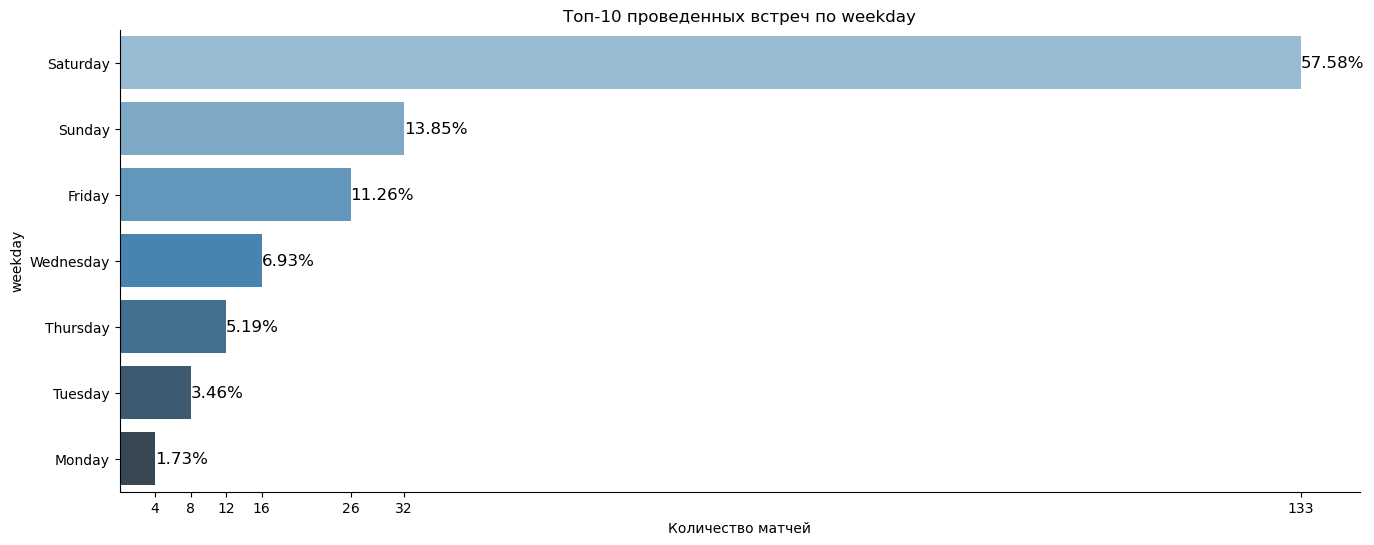

Уникальных значений weekday: 7


In [43]:
make_top_10(clean, 'weekday')

Большинство игр было сыграно в субботу — 133 игры, что составляет 57.58% от общего числа. Далее следуют воскресенье (13.85%) и пятница (11.26%). Меньше всего игр проведено в понедельник — всего 1.73%. Это связано с тем, что спортивные мероприятия стараются организовывать в наиболее удобное для зрителей время и дни недели.

### Команды и стадионы

#### Команда футболиста

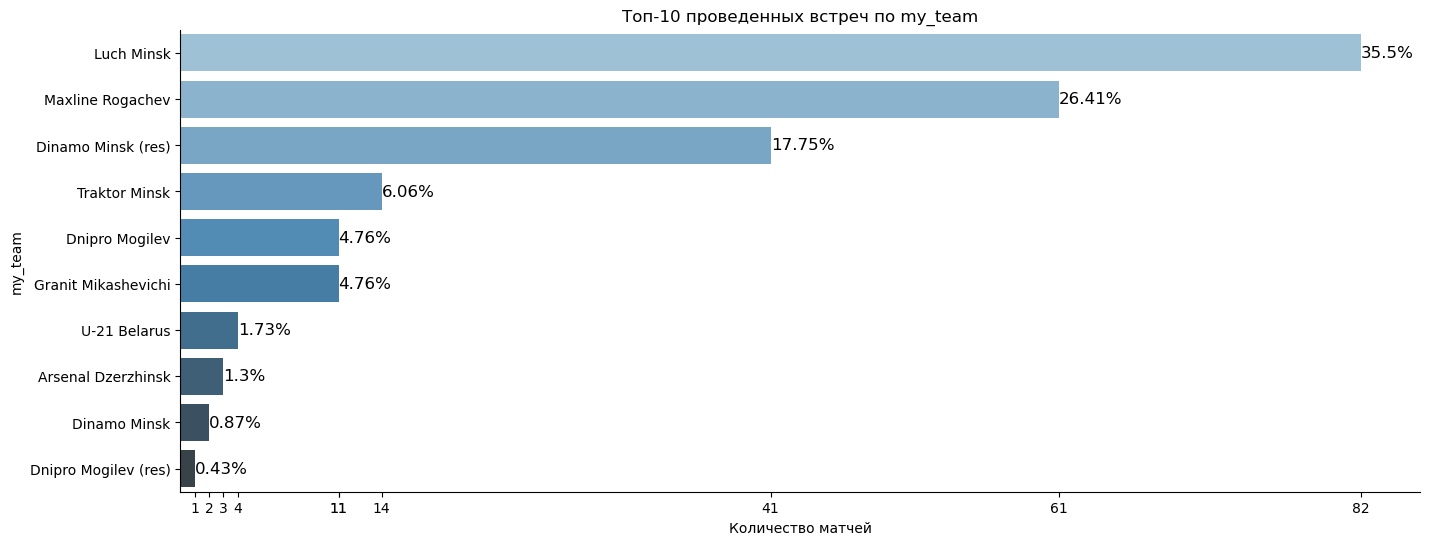

Уникальных значений my_team: 11


In [44]:
make_top_10(clean, 'team')

Всего футболист выступал за 11 команд. В список не включена резервная команда "Луч" (Минск), за которую он сыграл 1 матч. Наибольшее количество матчей он провёл за основной состав "Луча" — 82 игры, что составляет 35.5% от общего числа. На втором месте — "Макслайн" с 61 матчем (26.41%).

#### Команда противника

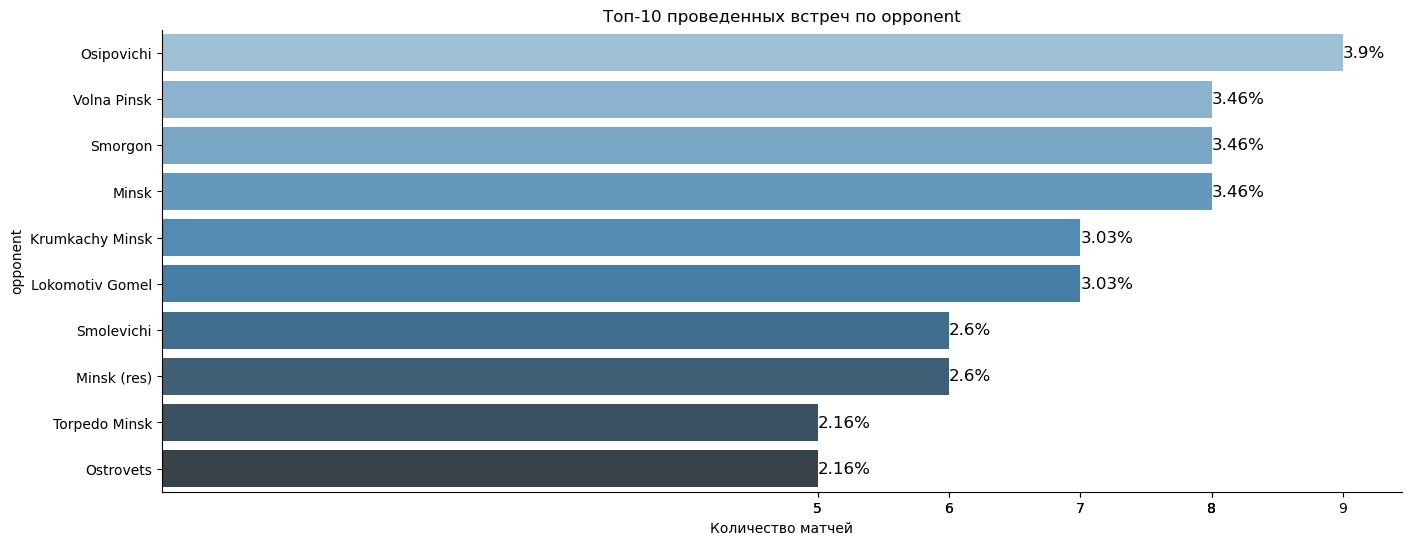

Уникальных значений opponent: 95


In [45]:
make_top_10(clean, 'opponent')

На момент анализа футболист сыграл против 95 различных соперников. Чаще всего он встречался с командой "Осиповичи" — 9 раз, что составляет 3.9% от общего количества матчей. На втором месте находятся команды "Волна" (Пинск), "Сморгонь" и "ФК Минск", против которых он сыграл по 8 матчей.

#### Город команды противника

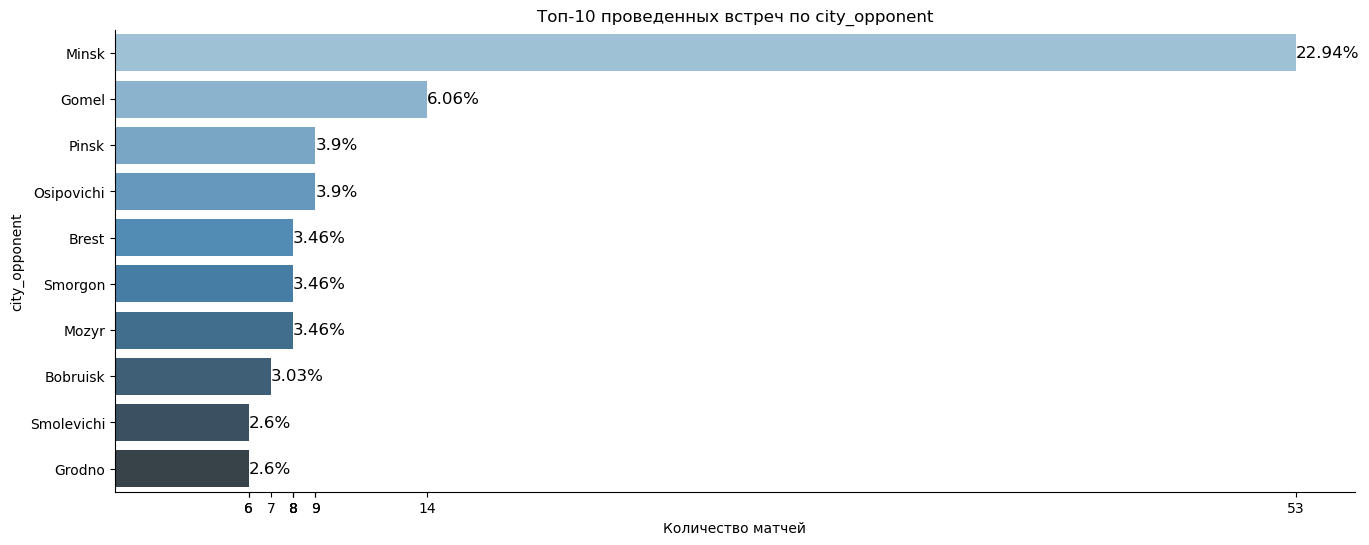

Уникальных значений city_opponent: 50


In [46]:
make_top_10(clean, 'city_opponent')

Футболисту пришлось выступать против команд из 50 различных городов. Чаще всего он играл против команд из Минска — 53 раза, что составляет 22.94% от общего количества матчей. На втором месте команды из Гомеля, против которых он сыграл 14 раз (6.06%).

#### Стадион
Необходимо немного изменить функцию, чтобы сгруппиоровать по двум столбцам.

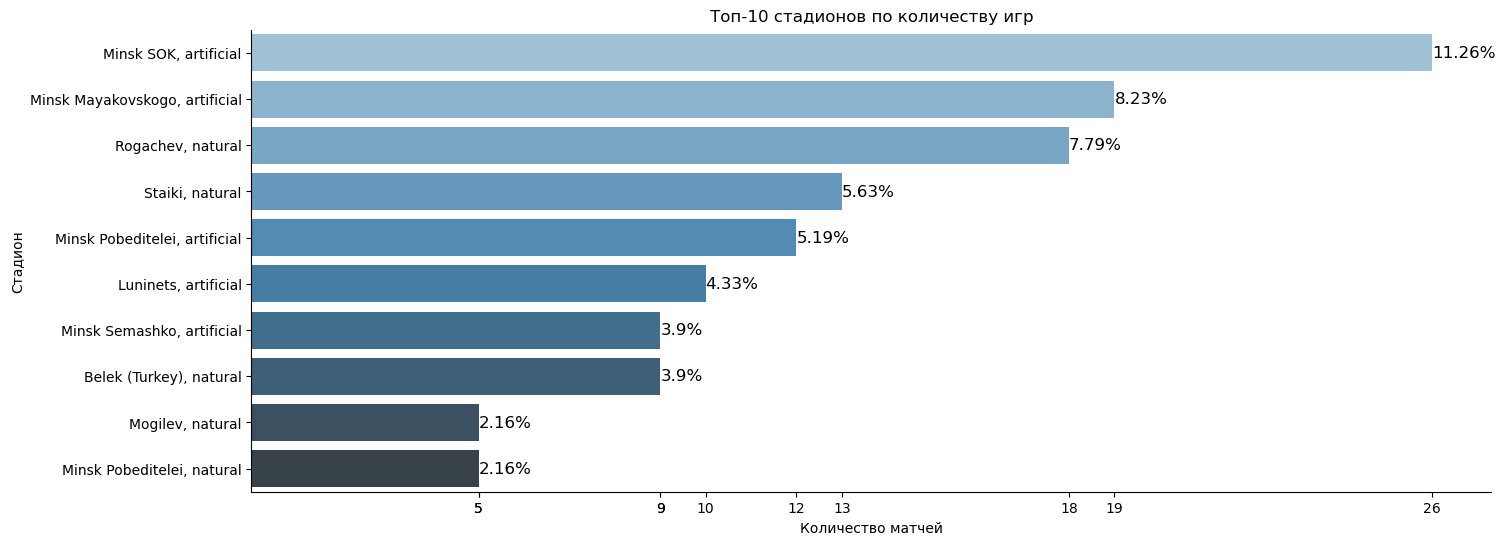

In [68]:
group = (
    clean.groupby(['stadium', 'surface']).agg({'date':'count'})
    .sort_values(by='date', ascending=False)
    .reset_index()
    .head(10)
)
group['percent_of_total'] = round(group['date'] / len(clean) * 100, 2)
group['stadium_surface'] = group['stadium'] + ', ' + group['surface']

plt.figure(figsize=(16,6))
fig = sns.barplot(
    data=group,  # выбираем топ-10 значений
    x='date',
    y='stadium_surface',
    palette='Blues_d',
    hue='stadium_surface'
)
    
# Добавление тиков только для значений топ-10
plt.xticks(ticks=group['date'], labels=[f'{int(val)}' for val in group['date']])

# Добавление значений процентов на график
for index, value in enumerate(group['percent_of_total']):
    count_value = group['date'].iloc[index]
    plt.text(count_value, index, f'{value}%', va='center', ha='left', fontsize=12)

fig.set_title(f'Топ-10 стадионов по количеству игр')
fig.set_xlabel('Количество матчей')
fig.set_ylabel(f'Стадион')
sns.despine()
plt.show()

Футболист чаще всего проводил матчи на искусственном газоне стадиона СОК «Олимпийский» в Минске — 26 раз (11.26% от всех матчей). На втором месте стадион по улице Маяковского в Минске — 19 матчей (8.23%). Среди стадионов с натуральным покрытием лидирует стадион в Рогачёве — 18 матчей (7.79%).

#### Город проведения встречи

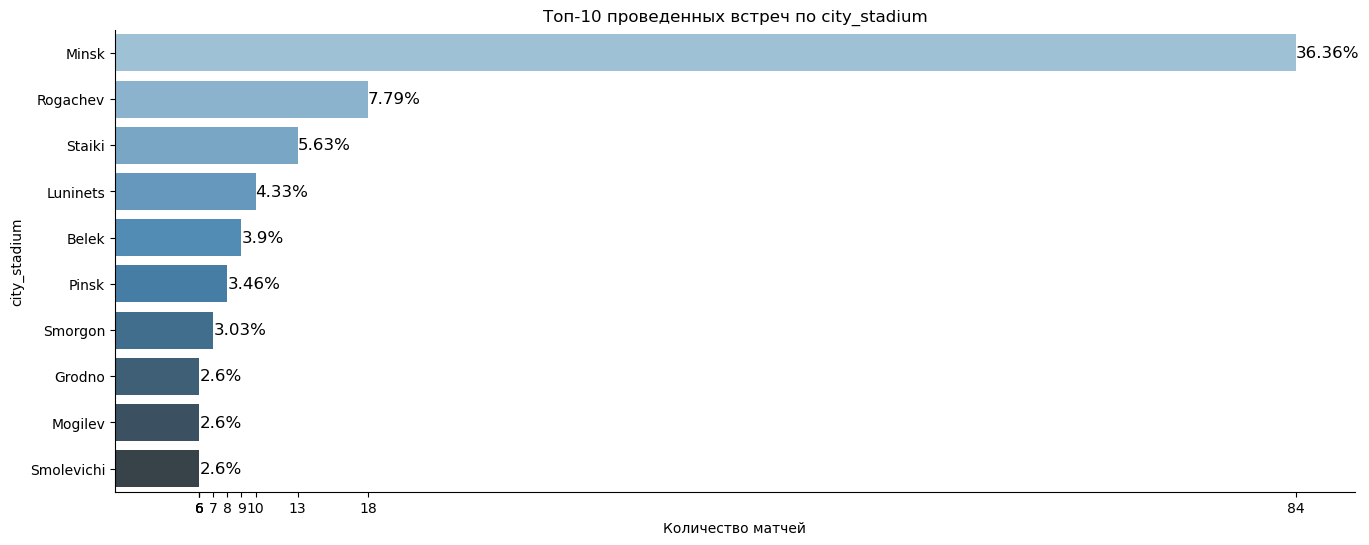

Уникальных значений city_stadium: 41


In [49]:
make_top_10(clean, 'city_stadium')

Футболист выступал в 41 различном городе. Больше всего матчей было сыграно в столице Беларуси — Минске: 84 встречи, что составляет 36.36% от общего количества. Это связано с тем, что большинство команд, за которые он играл, либо базируются в Минске, либо проводят там тренировки (например, "Макслайн" из Рогачёва). На втором месте находится сам Рогачёв, где было проведено 18 игр (7.79%).

### Голы команды

#### Голы забитые командой

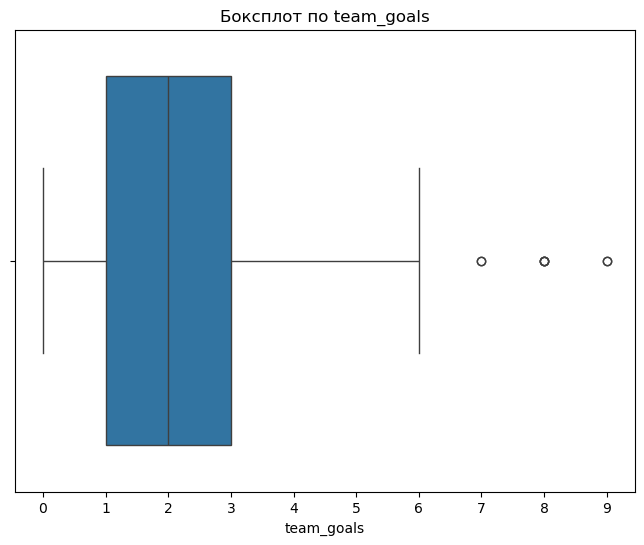

In [50]:
make_boxplot(clean, 'team_goals')

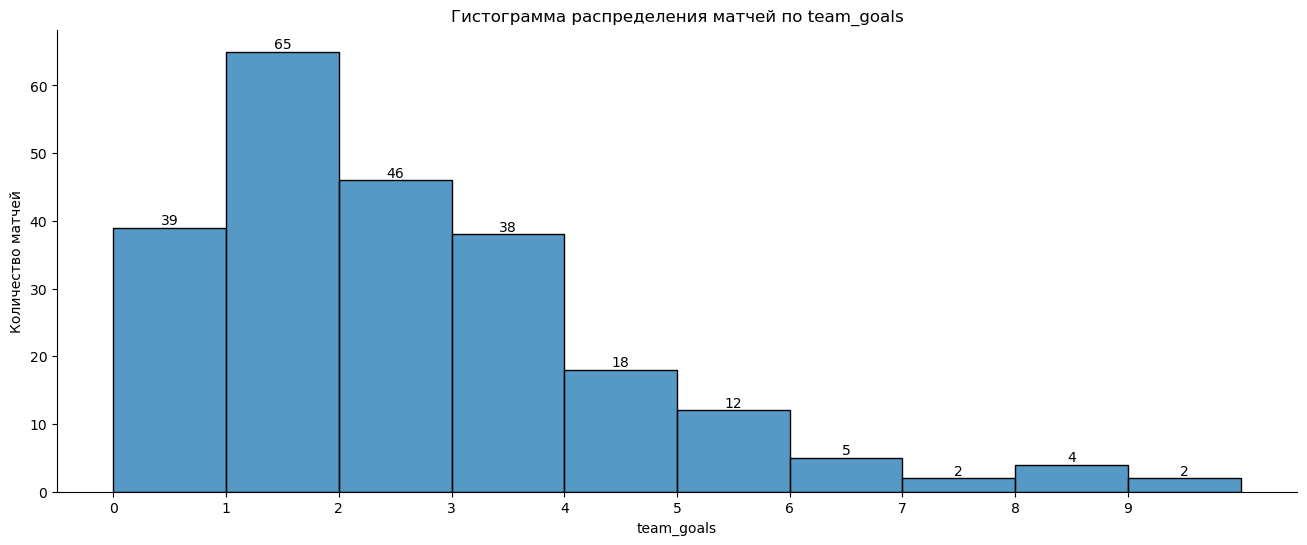

Уникальных значений team_goals: 10
count    231.000000
mean       2.151515
std        1.871638
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: team_goals, dtype: float64


In [51]:
make_hist(clean, 'team_goals', list(range(0, 11)))
print(clean['team_goals'].describe())

Команды, за которые выступал футболист, забивали от 0 до 9 голов в ворота соперников. Чаще всего они забивали 1 гол — 65 раз, на втором месте 2 гола — 46 раз. В среднем команды забивали 2.15 мяча за игру, медианное количество голов - 2 гола. В двух матчах удалось забить аж 9 мячей сопернику. 25 раз удавалось забить 5 и более мячей за игру в ворота соперника.

#### Пропущенные голы

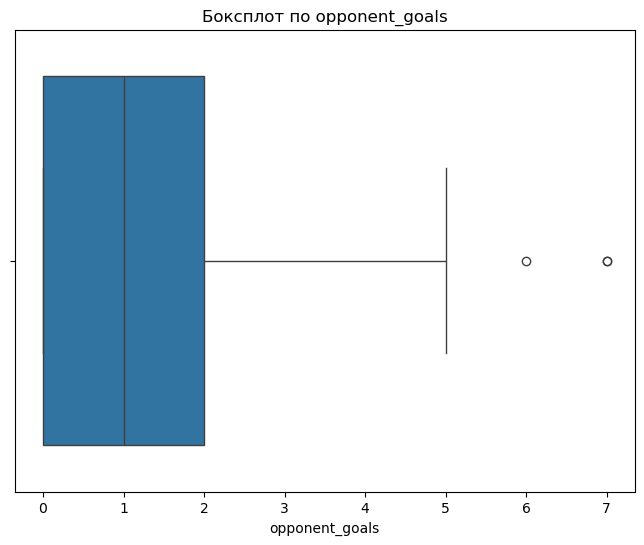

In [52]:
make_boxplot(clean, 'opponent_goals')

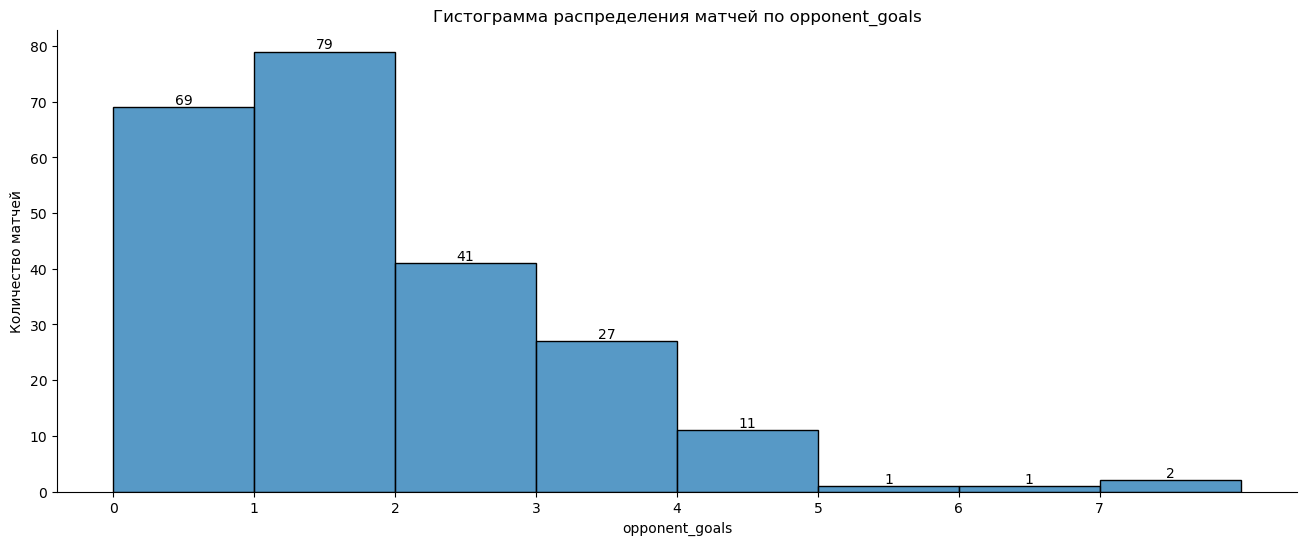

Уникальных значений opponent_goals: 8
count    231.000000
mean       1.346320
std        1.322538
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: opponent_goals, dtype: float64


In [53]:
make_hist(clean, 'opponent_goals', list(range(0, 9)))
print(clean['opponent_goals'].describe())

Соперники забивали от 0 до 7 голов в ворота команды. Чаще всего команда пропускала 1 мяч - 79 раз. 69 раз команда не пропускала ни одного мяча в свои ворота. Среднее количество пропущенных мячей за матч - 1.32 мяча, медианное - 1 мяч. Лишь 4 раза команда пропускала больше 4 мячей за игру.

### Результат/очки за матч

result
win     120
lose     67
draw     44
Name: count, dtype: int64

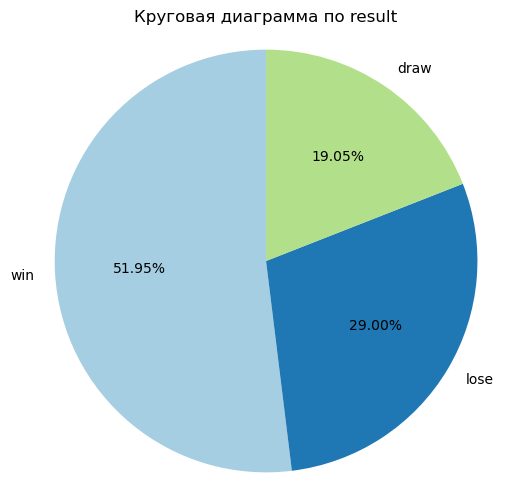

In [54]:
make_pie_chart(clean, 'result')

In [55]:
clean['points'].describe()

count    231.000000
mean       1.748918
std        1.347199
min        0.000000
25%        0.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: points, dtype: float64

Команда футболиста одержала победу 120 раз (51.95%), проиграла 67 раз (29%) и сыграла вничью 44 раза (19.05%). В среднем команда набирала 1,75 очка за матч. Это неплохой показатель, команда футболиста чаще одерживала победы, чем теряла очки.

### Тип покрытия

surface
artificial    137
natural        94
Name: count, dtype: int64

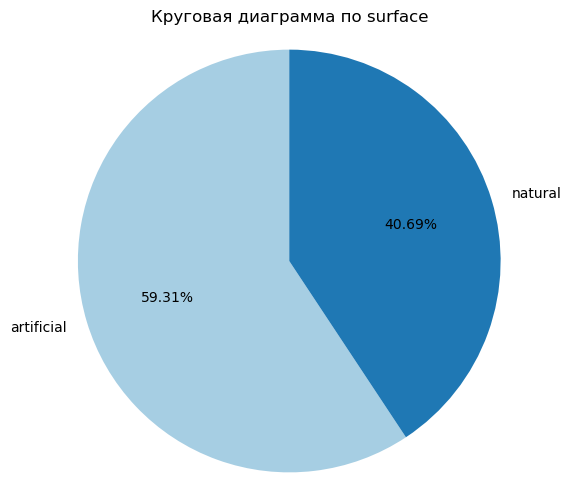

In [56]:
make_pie_chart(clean, 'surface')

Футболист провёл 137 матчей на искусственном газоне (59,31%) и 94 игры на натуральной траве (40,96%). В Беларуси командам разрешено играть на полях с искусственным покрытием, особенно во время предсезонной подготовки (январь — март), когда погодные условия делают использование натурального газона затруднительным. С 2021 года для клубов Высшей лиги было введено обязательное требование проводить домашние матчи на натуральных газонах. Однако это правило касается только Высшей лиги — в Первой и Второй лигах по-прежнему разрешено проводить матчи на искусственном покрытии.

### Домашний/гостевой матч

home_away
away       109
home       101
neutral     21
Name: count, dtype: int64

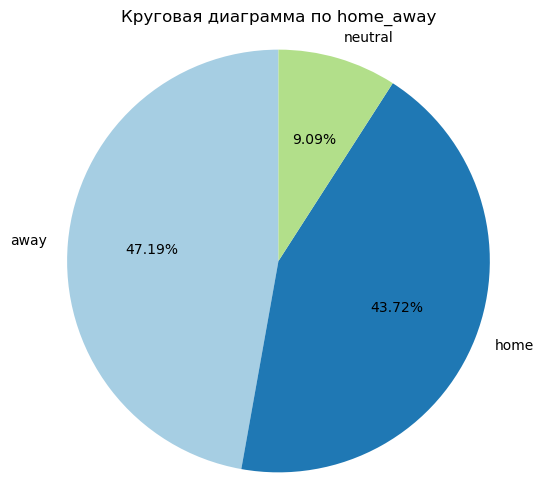

In [57]:
make_pie_chart(clean, 'home_away')

Футболист провёл 109 матчей (47.19%) на выезде, когда хозяином поля был соперник, 102 домашних матча (43.72%), а также 21 матч на нейтральных стадионах. Под нейтральными стадионами подразумеваются поля, не принадлежащие ни одной из команд. Например, это могут быть финалы или товарищеские турниры, как в случае с финалом Кубка Второй лиги между "Макслайном" и "Островцом", или матчи в рамках предсезонной подготовки в Турции, где команды играли с клубами из других стран.

### Турнир

tournament
friendly    83
first       61
reserve     33
premier     23
second      23
cup          8
Name: count, dtype: int64

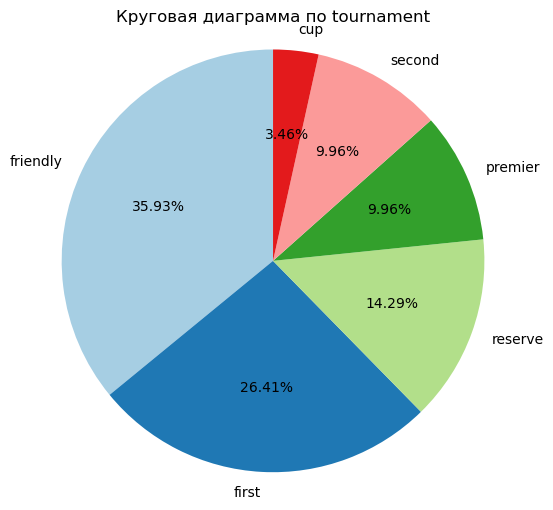

In [58]:
make_pie_chart(clean, 'tournament')

Футболист провёл наибольшее количество товарищеских игр — 83 матча (35.93% от общего числа). Далее следуют матчи в рамках Первой лиги — 61 игра (26.41%), а также 33 матча в Первенстве дублеров. По 23 матча было сыграно в рамках Второй лиги и Высшей лиги, а также 8 матчей в Кубке Беларуси.

### Минуты на поле

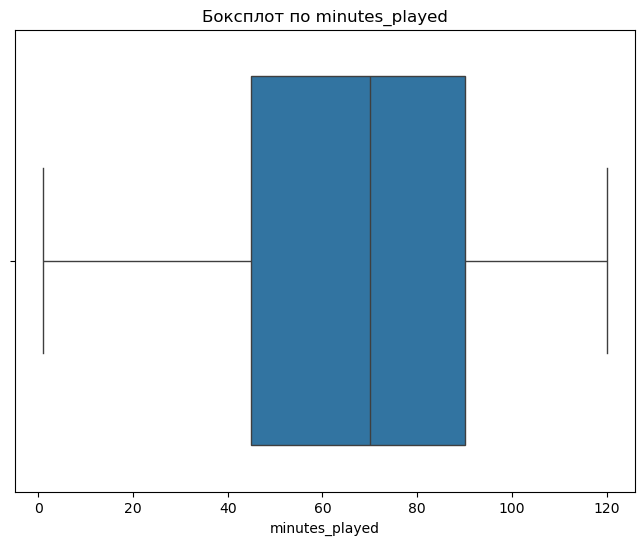

In [59]:
make_boxplot(clean, 'minutes_played')

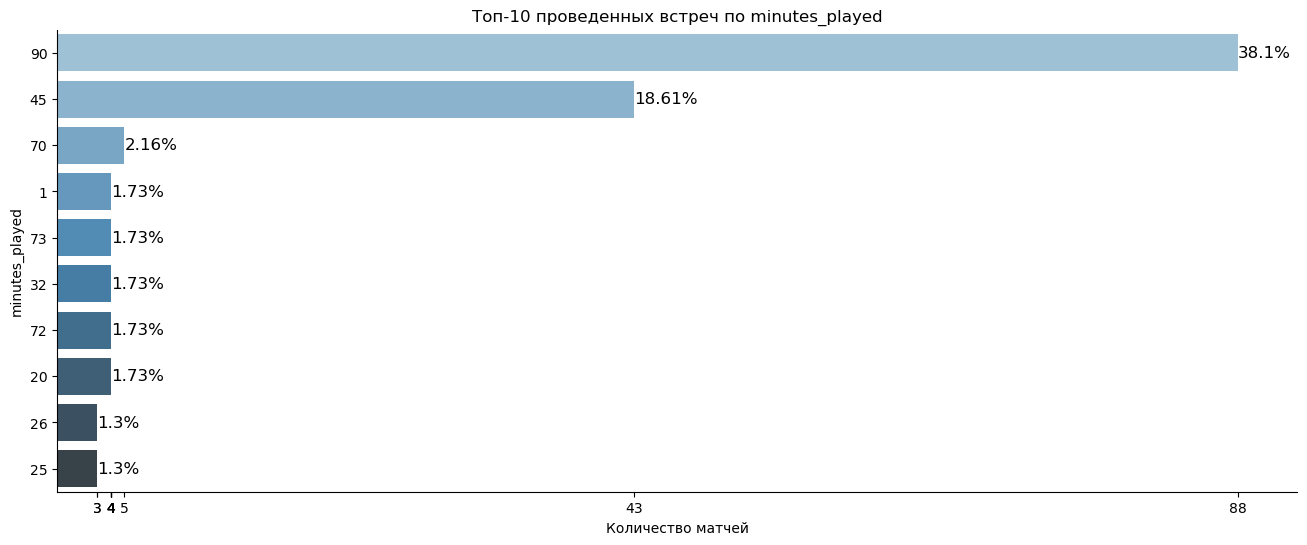

Уникальных значений minutes_played: 59


count    231.000000
mean      62.978355
std       28.050645
min        1.000000
25%       45.000000
50%       70.000000
75%       90.000000
max      120.000000
Name: minutes_played, dtype: float64

In [60]:
make_top_10(clean, 'minutes_played')
clean['minutes_played'].describe()

minutes_category
over 60     132
30 to 59     64
under 30     35
Name: count, dtype: int64

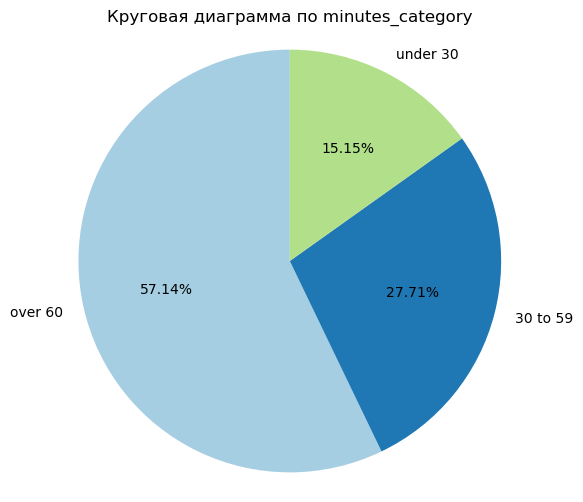

In [61]:
make_pie_chart(clean, 'minutes_category')

Чаще всего футболист проводил на поле 90 минут — 88 раз (38.1%). Это означает, что футболист либо играл полный матч, либо был заменен на 90-й минуте. 43 раза футболист провел 45 минут (18.61%) — это распространенное явление в предсезонной подготовке, когда всем футболистам дают возможность выйти на поле по тайму. В среднем футболист проводил на поле 62.97 минуты за матч. Максимальное время, проведенное на поле, составило 120 минут — такое возможно в кубковых матчах или финальных стадиях плей-офф чемпионатов, когда основное время завершается вничью и назначается еще 30 минут дополнительного времени. Минимальное время на поле — 1 минута. В 57.14% случаев футболист проводил на поле более 60 минут, в 15.15% случаев — менее 30 минут.

### Позиция на поле

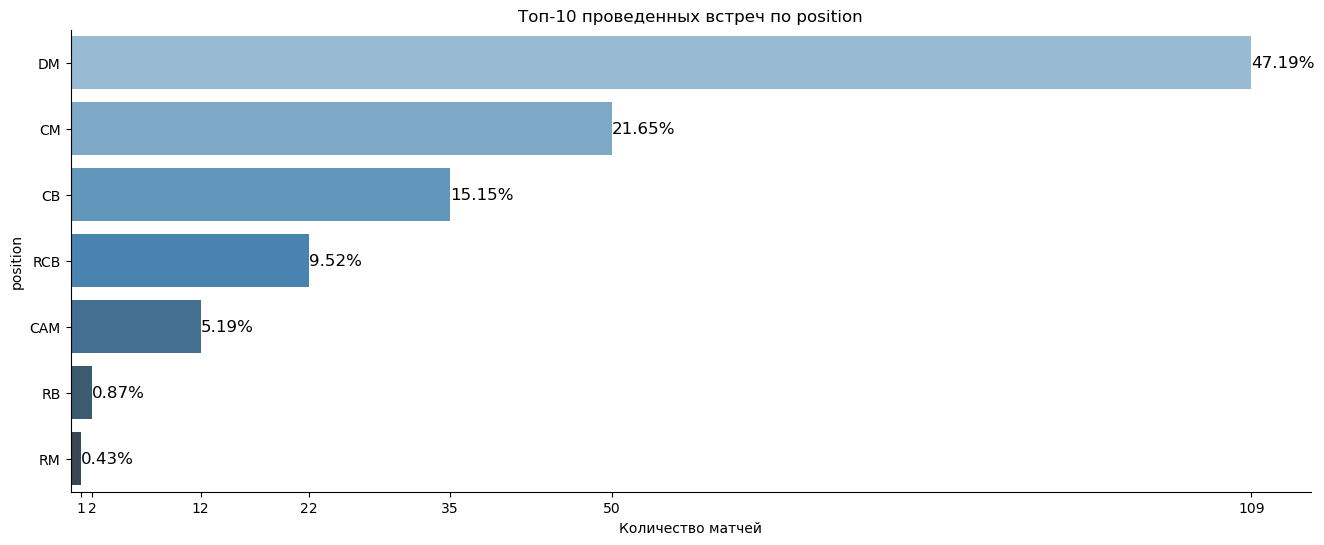

Уникальных значений position: 7


In [62]:
make_top_10(clean, 'position')

position_category
midfield    172
defense      59
Name: count, dtype: int64

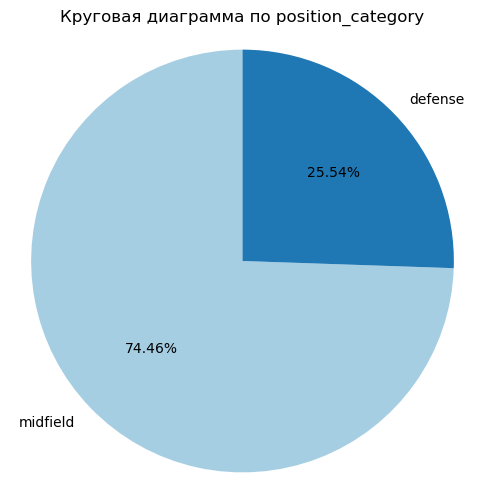

In [63]:
make_pie_chart(clean, 'position_category')

Футболист сыграл на 7 различных позициях в рамках своей карьеры. Чаще всего он выступал на позиции опорного полузащитника — 109 раз (47.19%), далее на позиции центрального полузащитника — 50 раз (21.65%). Лишь один раз он играл на позиции правого полузащитника и дважды на позиции правого защитника. Стоит отметить, что в ходе матчей позиция на поле могла изменяться, и в таблицу занесены позиции, с которых футболист начинал матч. Всего 172 раза футболист играл на позиции полузащитника (74.46%), и 59 раз — на позиции защитника (25.54%).

### Голы/голевые передачи/карточки

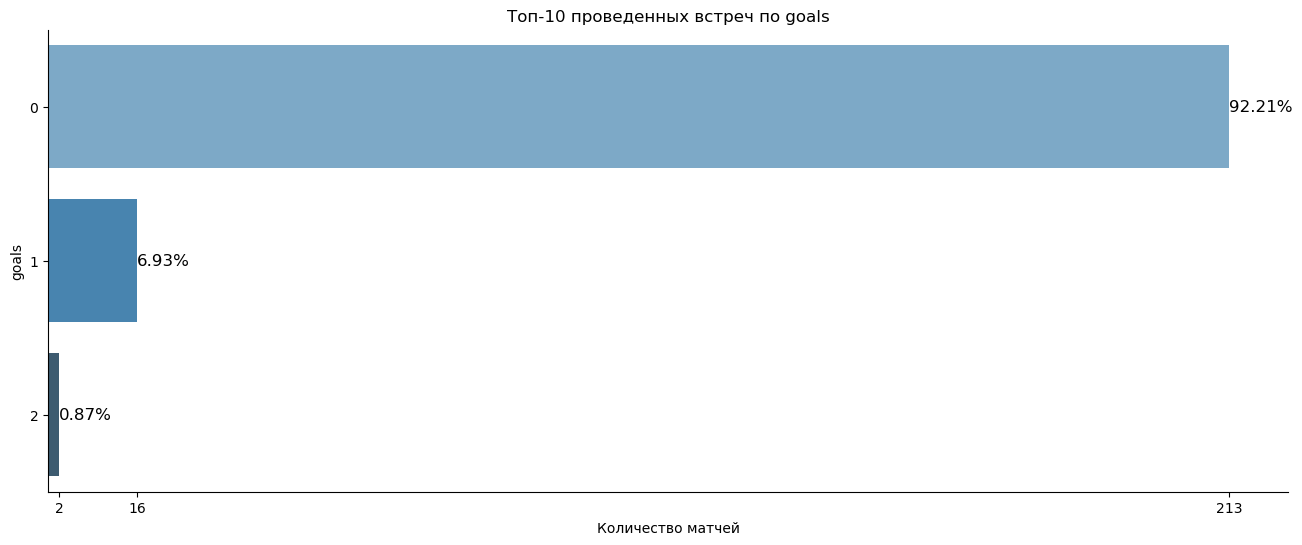

Уникальных значений goals: 3


0.09

In [64]:
make_top_10(clean, 'goals')
round(clean['goals'].mean(), 2)

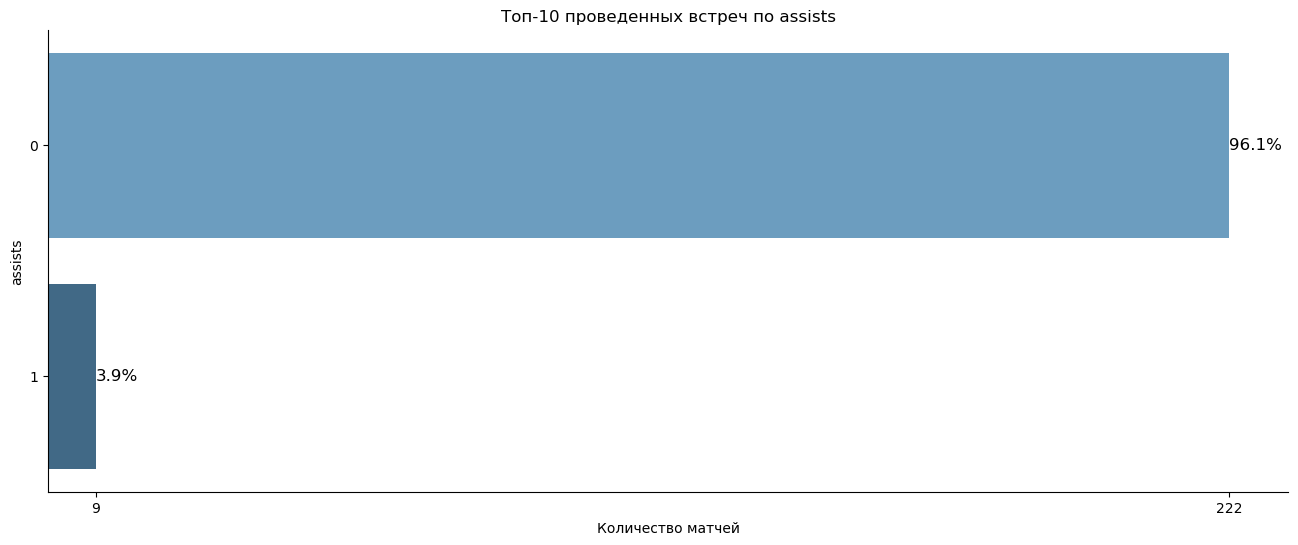

Уникальных значений assists: 2


0.04

In [65]:
make_top_10(clean, 'assists')
round(clean['assists'].mean(), 2)

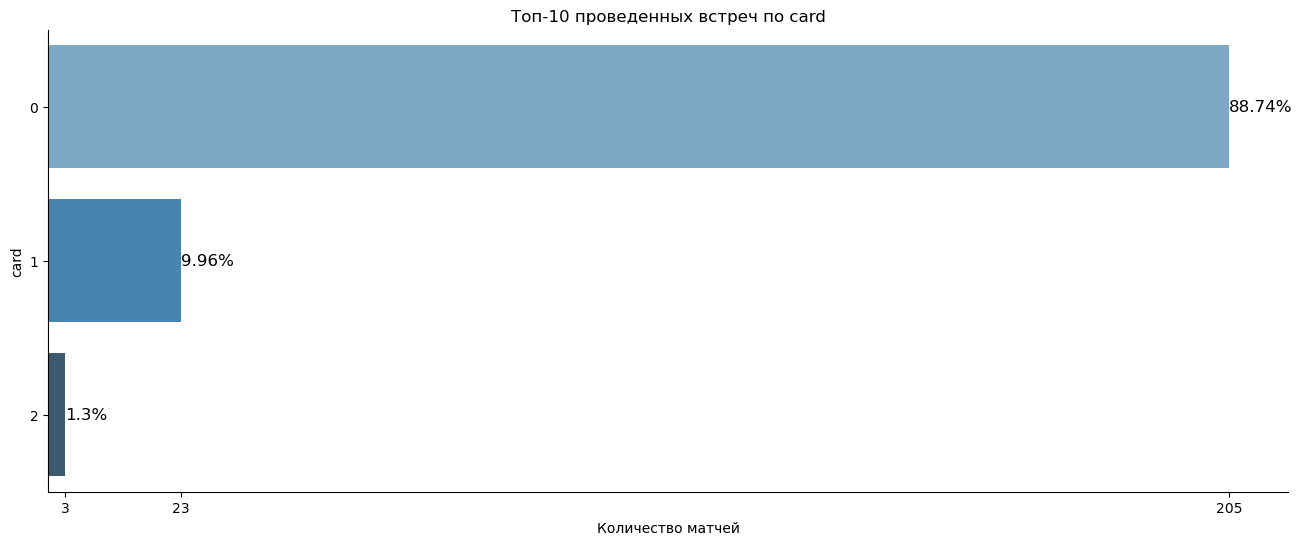

Уникальных значений card: 3


0.13

In [66]:
make_top_10(clean, 'card')
round(clean['card'].mean(), 2)

Футболист провёл 16 матчей, забив один гол (6.93% от всех матчей). В двух матчах он отметился двумя забитыми мячами. В 9 матчах он сделал голевую передачу (3.9% от всех матчей). В 23 матчах футболист получал жёлтую карточку (9.96% от всех матчей), а в 3 матчах был удалён с поля после получения второй жёлтой карточки. В среднем за матч футболист забивает 0.09 голов, отдаёт 0.04 голевых передач и получает 0.13 карточек.

Его низкая результативность объясняется оборонительной позицией на поле. Однако количество карточек у футболиста ниже среднего для его позиции: он получает 0.13 карточек за матч, тогда как среднее значение для игроков оборонительных позиций обычно составляет 0.2–0.3 карточки за игру.

### Выводы по исследовательскому анализу

- Написал функции для построения гистограммы, столбчатой диаграммы для топ-10 значений, круговой диаграммы и боксплота.
- Применил написанные функции, посмотрел описательную статистику данных и сделал выводы на основании полученных данных.
- Имеем данные с 2015-07-00 по 2023-11-0 Всего о:  матч231, уникальных  такжеат: 2 1.
В один день проводился максимум один матч.
- Максимальное количество игр за месяц было зарегистрировано в начале 2018 года и составило 9 игр. Среднее число игр в месяц составляет 2.3, а медианное — 2 игры. В декабре каждого года наблюдается спад количества игр до 0. Это связано с особенностями проведения чемпионатов Республики Беларусь по футболу, которые обычно проходят с марта-апреля до ноября. В декабре футболисты часто находятся в отпуске, а с начала января начинается подготовка к новому сезону, в рамках которой обычно проводится больше игр по сравнению с самим сезоном.
- Отсутствие игр на протяжении большей части 2020 года связано с тем, что футболист временно приостановил свою карьеру. Некоторые спады в количестве игр объясняются травмами, в то время как другие обусловлены спортивным принципом и конкуренцией.
- В таблице представлены данные за каждыгодовз 9 лет с 2015 по 2023 год. Больше всего игр было сыграно в 2017 году — 47 матчей, затем следует 2022 год с 40 играми. Наименьшее количество игр зафиксировано в 2020 году — 3 матча, и в 2015 году — 4. Однако стоит отметить, что в 2015 году футболист также участвовал в юношеском первенстве, данные по которому не удалось собрать. Важно подчеркнуть, что в 2016 году футболист также играл в юношеском первенстве параллельно с основными матчами, что могло отразиться на статистике.
- Среднее число игр за указанный промежуток времени составляет 25.67 матчей в год.
- Игры проводились в каждый из 12 месяцев. В декабре был сыгран только один матч. Больше всего игр проводилось в феврале (29) и марте (28) — как уже упоминалось, это связано с тем, что во время подготовки к старту чемпионата играется большее количество матчей. Из месяцев, проходящих в сезон, больше всего игр было сыграно в августе (25).
- Игры проводились в каждое число месяца. Меньше всего матчей было сыграно 31 числа — вс.х 12 игр).
- Большинство игр было сыграно в субботу — 133 игры, что составляет 57.58% от общего числа. Далее следуют воскресенье (13.85%) и пятница (11.26%). Меньше всего игр проведено в понедельник — всего 1.73%. Это связано с тем, что спортивные мероприятия стараются организовывать в наиболее удобное для зрителей время и дни недели.
- Всего футболист выступал з рал 1 матч. Наибольшее количество матчей он провёл за основной состав "Луча" — 82 игры, что составляет 35.5% от общего числа. На втором месте — "Макслайн" с 61 матчем (26.41%).
- На момент анализа футболист сыграл против 95 различных соперников. Чаще всего он встречался с командой "Осиповичи" — 9 раз, что составляет 3.9% от общего количества матчей. На втором месте находятся команды "Волна" (Пинск), "Сморгонь" и "ФК Минск", против которых он сыграл по 8 матчей.
- ходилосьлисту пиишлось выступать против команд из 50 различных городов. Чаще всего он играл против команд из Минска — 53 раза, что составляет 22.94% от общего количества матчей. На втором месте команды из Гомеля, против которых он сыграл 14 раз (6.06%).
- Футболист чаще всего проводил матчи на искусственном газоне стадиона СОК «Олимпийский» в Минске — 26 раз (11.26% от всех матчей). На втором месте стадион по улице Маяковского в Минске — 19 матчей (8.23%). Среди стадионов с натуральным покрытием лидирует стадион в Рогачёве — 18 матчей (7.79%).
- Футболист выступал в 41 различном городе. Больше всего матчей было сыграно в столице Беларуси — Минске: 84 встречи, что составляет 36.36% от общего количества. Это связано с тем, что большинство команд, за которые он играл, либо базируются в Минске, либо проводят там тренировки (например, "Макслайн" из Рогачёва). На втором месте находится сам Рогачёв, где было проведено 18 игр (7.79%).
- Команды, за которые выступал футболист, забивали от 0 до 9 голов в ворота соперников. Чаще всего они забивали 1 гол — 65 раз, на втором месте 2 гола — 46 раз. В среднем команды забивали 2.15 мяча за игру, медианное количество голов - 2 гола. В двух матчах удалось забить аж 9 мячей сопернику. 25 раз удавалось забить 5 и более мячей за игру в ворота соперника.
- Соперники забивали от 0 до 7 голов в ворота команды. Чаще всего команда пропускала 1 мяч - 79 раз. 69 раз команда не пропускала ни одного мяча в свои ворота. Среднее количество пропущенных мячей за матч - 1.32 мяча, медианное - 1 мяч. Лишь 4 раза команда пропускала больше 4 мячей за игру.
- Команда футболиста одержала победу 120 раз (51.95%), проиграла 67 раз (29%) и сыграла вничью 44 раза (19.05%). В среднем команда набирала 1,75 очка за матч. Это неплохой показатель, команда футболиста чаще одерживала победы, чем теряла очки.
- Футболист провёл 137 матчей на искусственном газоне (59,31%) и 94 игры на натуралусственном покрытии.
- Футболист провёл 109 матчей (47.19%) на выезде, когда хозяином поля был соперник, 102 домашних матча (43.72%), а также 21 матч на нейтральных стадионах. Под нейтральными стадионами подразумеваются поля, не принадлежащие ни одной из команд. Например, это могут быть финалы или товарищеские турниры, как в случае с финалом Кубка Второй лиги между "Макслайном" и "Островцом", или матчи в рамках предсезонной подготовки в Турции, где команды играли с клубами из других стран.
- Футболист провёл наибольшее количество товарищеских игр — 83 матча (35.93% от общего числа). Далее следуют матчи в рамках Первой лиги — 61 игра (26.41%), а также 33 матча в Первенстве дублеров. По 23 матча было сыграно в рамках Второй лиги и Высшей лиги, а также 8 матчей в Кубке Беларуси.
- Чаще всего футболист проводил на поле 90 минут — 88 раз (38.1%). Это означает, что футболист либо играл полный матч, либо был заменен на 90-й минуте. 43 раза футболист провел 45 минут (18.61%) — это распространенное явление в предсезонной подготовке, когда всем футболистам дают возможность выйти на поле по тайму. В среднем футболист проводил на поле 62.97 минуты за матч. Максимальное время, проведенное на поле, составило 120 минут — такое возможно в кубковых матчах или финальных стадиях плей-офф чемпионатов, когда основное время завершается вничью и назначается еще 30 минут дополнительного времени. Минимальное время на поле — 1 минута. В 57.14% случаев футболист проводил на поле более 60 минут, в 15.15% случаев — менее 30 минут.
- Футболист сыграл на 7 различных позициях в рамках своей карьеры. Чаще всего он выступал на позиции опорного полузащитника — 109 раз (47.19%), далее на позиции центрального полузащитника 1 раз (21.65%). Лишь один раз он играл на позиции 2о полузащитника и дважды на позиции правого защитника. Стоит отметить, что в ходе матчей позиция на поле могла изменяться, и в таблицу занесены позиции, с которых футболист начинал матч. Всего 172 раза футболист играл на позиции полузащитника (74.46%), и 59 раз — на позиции защитника (25.54%).
- Футболист провёл 16 матчей, забив один гол (2% от всех матчей). В 2матчах он отметился двумя забитыми мяча1 ми. В 9 матчах он сделал голевую передачу (3.9% от всех матчей). В 23 1 матчах футболист получал жёлтую карточку (9.96% от всех матчей), а в 3 матчах был удалён с поля после получения второй жёлтой карточки. В среднем за матч футболист забивает 0.09 голов, отдаёт 0.04 голевых передач и получает 0.13 карточек. Его низкая результативность объясняется оборонительной позицией на поле. Однако количество карточек у футболиста ниже среднего для его позиции: он получает 0.13 карточек за матч, тогда как среднее значение для игроков оборонительных позиций обычно составляет 0.2–0.3 карточки за игру.ч.

## Аналитическая часть
Проект находится на стадии аналитической части с 30.09.2024.